In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from matplotlib_venn import venn2
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import shap
import lime
from matplotlib_venn import venn3
from lime.lime_tabular import LimeTabularExplainer

#### Reading files for Payment Anomalies

In [2]:
payments_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_order_payments_dataset.csv\olist_order_payments_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_10848\1779146954.py:1: SyntaxWarning: invalid escape sequence '\T'
  payments_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_order_payments_dataset.csv\olist_order_payments_dataset.csv")


In [3]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
payments_df['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [5]:
not_defined = ['not_defined']
payments_df = payments_df[
    ~payments_df['payment_type'].isin(not_defined)
]

In [6]:
payments_df['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

In [7]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  object 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  object 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [8]:
orderitems_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_order_items_dataset.csv\olist_order_items_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_10848\4116819424.py:1: SyntaxWarning: invalid escape sequence '\T'
  orderitems_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_order_items_dataset.csv\olist_order_items_dataset.csv")


In [9]:
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [11]:
orders_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_orders_dataset.csv\olist_orders_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_10848\4171385676.py:1: SyntaxWarning: invalid escape sequence '\T'
  orders_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_orders_dataset.csv\olist_orders_dataset.csv")


In [12]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
customers_df = pd.read_csv(r"E:\Trinity - Dissertation\Dataset\olist_customers_dataset.csv\olist_customers_dataset.csv")

In [15]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [16]:
products_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_products_dataset.csv\olist_products_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_10848\3924231627.py:1: SyntaxWarning: invalid escape sequence '\T'
  products_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_products_dataset.csv\olist_products_dataset.csv")


In [17]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
productcat_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\product_category_name_translation.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_10848\2423820311.py:1: SyntaxWarning: invalid escape sequence '\T'
  productcat_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\product_category_name_translation.csv")


In [19]:
productcat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Payments anomalies

#### Merging the files

In [20]:
# Impute missing keys in products_df
products_df['product_category_name'] = products_df['product_category_name'].fillna('Unknown')

# Merging with translation and impute missing translations
products_full = products_df.merge(
    productcat_df, on='product_category_name', how='left'
)

products_full['product_category_name_english'] = (
    products_full['product_category_name_english'].fillna('Unknown')
)

In [21]:
# Merging all the files together
products_full = products_df.merge(productcat_df, on="product_category_name", how="left")

orderitems_full = orderitems_df.merge(products_full, on="product_id", how="left")

orderitems_full['product_category_name_english'] = (
    orderitems_full['product_category_name_english'].fillna('Unknown')
)

orderitems_agg = orderitems_full.groupby("order_id").agg(
    order_value=("price","sum"),
    avg_freight=("freight_value","mean"),
    avg_weight_g=("product_weight_g","mean"),
    distinct_categories=("product_category_name_english","nunique"),
    item_count=("order_item_id","count")
).reset_index()

order_category_list = (
    orderitems_full
    .groupby("order_id")["product_category_name_english"]
    .apply(lambda cats: ", ".join(sorted(set(cats.dropna()))))
    .reset_index()
    .rename(columns={"product_category_name_english":"category_list"})
)

orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_approved_at"]       = pd.to_datetime(orders_df["order_approved_at"])

payment_agg = payments_df.groupby("order_id") \
    .agg(
        payment_type=("payment_type", "first"),
        total_payment_value=("payment_value", "sum"),
        num_installments=("payment_installments", "max"),
        payment_count=("payment_sequential", "count")
    ) \
    .reset_index()

merged_df = (
    payment_agg
    .merge(orderitems_agg, on="order_id", how="left")
    .merge(order_category_list, on="order_id", how="left")
    .merge(orders_df[["order_id","customer_id","order_purchase_timestamp",
                     "order_approved_at","order_status"]],
           on="order_id", how="left")
    .merge(customers_df[["customer_id","customer_unique_id",
                        "customer_city","customer_state"]],
           on="customer_id", how="left")
)

In [22]:
merged_df.head()

,order_id,payment_type,total_payment_value,num_installments,payment_count,order_value,avg_freight,avg_weight_g,distinct_categories,item_count,category_list,customer_id,order_purchase_timestamp,order_approved_at,order_status,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19,2,1,58.90,13.29,650.0,1.0,1.0,cool_stuff,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13 09:45:35,delivered,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83,3,1,239.90,19.93,30000.0,1.0,1.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-04-26 11:05:13,delivered,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87,5,1,199.00,17.87,3050.0,1.0,1.0,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-14 14:48:30,delivered,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78,2,1,12.99,12.79,200.0,1.0,1.0,perfumery,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-08 10:10:18,delivered,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04,3,1,199.90,18.14,3750.0,1.0,1.0,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-02-04 14:10:13,delivered,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP


In [23]:
# merged_df.to_csv("payment_merged_df.csv")

#### Feature Engineering

In [24]:
merged_df['days_to_payment'] = (merged_df['order_approved_at'] - merged_df['order_purchase_timestamp']).dt.days

In [25]:
payment_features_df = merged_df.copy()

#### Statistical Baseline

In [26]:
df = payment_features_df  

# Null counts per column
null_counts = df.isnull().sum()

# Zero counts per column
zero_counts = df.select_dtypes(include=[np.number]).apply(lambda col: (col == 0).sum())

summary = pd.DataFrame({
    'null_count': null_counts,
    'zero_count': zero_counts.reindex(null_counts.index, fill_value=0).astype(int)
})

summary

,null_count,zero_count
order_id,0,0
payment_type,0,0
total_payment_value,0,0
num_installments,0,2
payment_count,0,0
order_value,772,0
avg_freight,772,338
avg_weight_g,788,6
distinct_categories,772,0
item_count,772,0


In [27]:
cols_required = [
                    'order_value',
                    'avg_freight',
                    'total_payment_value',
                    'avg_weight_g',
                    'distinct_categories',
                    'item_count',
                    'num_installments',
                    'days_to_payment',
                    'order_approved_at',
                    'order_purchase_timestamp'
                ]

df = payment_features_df.copy()

# Drop any orders missing *any* of the core features or timestamps
df_clean = df.dropna(subset=cols_required).copy()

# Handle zero installments as one payment
df_clean.loc[df_clean['num_installments']==0, 'num_installments'] = 1

# Recompute days_to_payment after removing nulls
df_clean['days_to_payment'] = (
    df_clean['order_approved_at'] - df_clean['order_purchase_timestamp']
).dt.days

# Records before/after drops
dropped = len(df) - len(df_clean)
print(f"Dropped {dropped} orders having nulls, core features—remaining records: {len(df_clean)}")

payment_features_clean = df_clean.reset_index(drop=True)

Dropped 802 orders having nulls, core features—remaining records: 98635


In [28]:
payment_features_clean[['num_installments', 'avg_freight','order_value']].head()

,num_installments,avg_freight,order_value
0,2,13.29,58.90
1,3,19.93,239.90
2,5,17.87,199.00
3,2,12.79,12.99
4,3,18.14,199.90


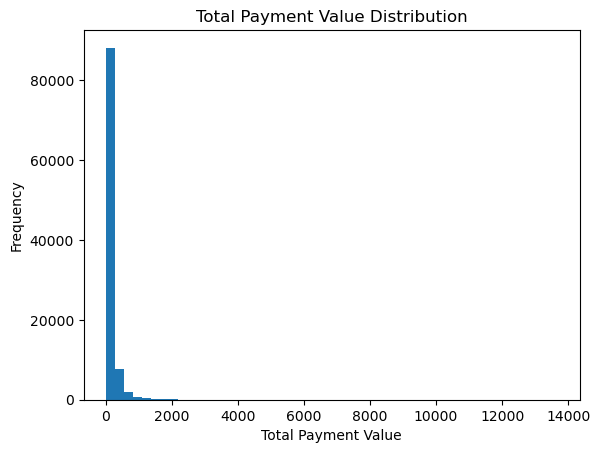

In [29]:
plt.figure()
plt.hist(payment_features_df['total_payment_value'], bins=50)
plt.title('Total Payment Value Distribution')
plt.xlabel('Total Payment Value')
plt.ylabel('Frequency')
plt.show()

In [30]:
df = payment_features_clean  

# Null counts per column
null_counts = df.isnull().sum()

# Zero counts per column
zero_counts = df.select_dtypes(include=[np.number]).apply(lambda col: (col == 0).sum())

summary = pd.DataFrame({
    'null_count': null_counts,
    'zero_count': zero_counts.reindex(null_counts.index, fill_value=0).astype(int)
})

print(summary)

                          null_count  zero_count
order_id                           0           0
payment_type                       0           0
total_payment_value                0           0
num_installments                   0           0
payment_count                      0           0
order_value                        0           0
avg_freight                        0         338
avg_weight_g                       0           6
distinct_categories                0           0
item_count                         0           0
category_list                      0           0
customer_id                        0           0
order_purchase_timestamp           0           0
order_approved_at                  0           0
order_status                       0           0
customer_unique_id                 0           0
customer_city                      0           0
customer_state                     0           0
days_to_payment                    0       81374


In [31]:
# Free‐shipping flag
payment_features_clean['free_shipping'] = (payment_features_clean['avg_freight'] == 0).astype(int)

# Same‐day payment flag
payment_features_clean['instant_payment'] = (payment_features_clean['days_to_payment'] == 0).astype(int)

In [32]:
payment_features_clean.describe()

,total_payment_value,num_installments,payment_count,order_value,avg_freight,avg_weight_g,distinct_categories,item_count,order_purchase_timestamp,order_approved_at,days_to_payment,free_shipping,instant_payment
count,98635.000000,98635.000000,98635.000000,98635.000000,98635.000000,98635.000000,98635.000000,98635.000000,98635,98635,98635.00000,98635.000000,98635.000000
mean,160.607759,2.932194,1.044497,137.753752,20.191562,2103.077091,1.008151,1.141725,2018-01-01 00:13:35.528787968,2018-01-01 10:32:51.498018048,0.26593,0.003427,0.825001
min,9.590000,1.000000,1.000000,0.850000,0.000000,0.000000,1.000000,1.000000,2016-09-04 21:15:19,2016-10-04 09:43:32,0.00000,0.000000,0.000000
25%,62.000000,1.000000,1.000000,45.900000,13.370000,300.000000,1.000000,1.000000,2017-09-13 08:21:21,2017-09-13 16:53:20.500000,0.00000,0.000000,1.000000
50%,105.290000,2.000000,1.000000,86.900000,16.360000,700.000000,1.000000,1.000000,2018-01-19 19:37:03,2018-01-20 09:15:46,0.00000,0.000000,1.000000
75%,176.880000,4.000000,1.000000,149.900000,21.180000,1813.000000,1.000000,1.000000,2018-05-04 20:47:30.500000,2018-05-05 09:10:34,0.00000,0.000000,1.000000
max,13664.080000,24.000000,29.000000,13440.000000,409.680000,40425.000000,3.000000,21.000000,2018-09-03 09:06:57,2018-09-03 17:40:06,60.00000,1.000000,1.000000
std,220.435708,2.715013,0.379265,210.593459,15.799773,3756.583255,0.091923,0.538479,NaN,NaN,0.77486,0.058439,0.379968


In [33]:
# One-hot encoding payment_type 
payment_features_clean = pd.get_dummies(
    payment_features_clean,
    columns=['payment_type'],
    prefix='payment_type',
    drop_first=True
)

In [34]:
payment_features_clean.head()

,order_id,total_payment_value,num_installments,payment_count,order_value,avg_freight,avg_weight_g,distinct_categories,item_count,category_list,...,order_status,customer_unique_id,customer_city,customer_state,days_to_payment,free_shipping,instant_payment,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,2,1,58.90,13.29,650.0,1.0,1.0,cool_stuff,...,delivered,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,0,0,1,True,False,False
1,00018f77f2f0320c557190d7a144bdd3,259.83,3,1,239.90,19.93,30000.0,1.0,1.0,pet_shop,...,delivered,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,0,0,1,True,False,False
2,000229ec398224ef6ca0657da4fc703e,216.87,5,1,199.00,17.87,3050.0,1.0,1.0,furniture_decor,...,delivered,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,0,0,1,True,False,False
3,00024acbcdf0a6daa1e931b038114c75,25.78,2,1,12.99,12.79,200.0,1.0,1.0,perfumery,...,delivered,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,0,0,1,True,False,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,3,1,199.90,18.14,3750.0,1.0,1.0,garden_tools,...,delivered,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,0,0,1,True,False,False


#### Z-score

In [35]:
df = payment_features_clean

feat_list = [
    'order_value',
    'num_installments',
    'days_to_payment',
    'total_payment_value',
    'avg_freight',
    'total_payment_value',
    'avg_weight_g',
    'item_count'
] + [c for c in df.columns if c.startswith('payment_type_')]

# z-scores
df_zscore = df[['order_id']].copy()
for f in feat_list:
    vals = df[f].replace([np.inf, -np.inf], np.nan)
    vals = vals.fillna(vals.mean())
    df_zscore[f'z_{f}'] = zscore(vals)

In [36]:
df_zscore.head()

,order_id,z_order_value,z_num_installments,z_days_to_payment,z_total_payment_value,z_avg_freight,z_avg_weight_g,z_item_count,z_payment_type_credit_card,z_payment_type_debit_card,z_payment_type_voucher
0,00010242fe8c5a6d1ba2dd792cb16214,-0.374438,-0.343350,-0.343199,-0.401107,-0.436816,-0.386810,-0.263196,0.563366,-0.125106,-0.166061
1,00018f77f2f0320c557190d7a144bdd3,0.485042,0.024974,-0.343199,0.450121,-0.016555,7.426180,-0.263196,0.563366,-0.125106,-0.166061
2,000229ec398224ef6ca0657da4fc703e,0.290828,0.761623,-0.343199,0.255233,-0.146937,0.252072,-0.263196,0.563366,-0.125106,-0.166061
3,00024acbcdf0a6daa1e931b038114c75,-0.592442,-0.343350,-0.343199,-0.611645,-0.468462,-0.506600,-0.263196,0.563366,-0.125106,-0.166061
4,00042b26cf59d7ce69dfabb4e55b4fd9,0.295102,0.024974,-0.343199,0.260541,-0.129848,0.438412,-0.263196,0.563366,-0.125106,-0.166061


In [37]:
z = df_zscore['z_order_value'].abs()
print("Number of total rows:", len(z))
print("Number of non-NaN rows:", z.notna().sum())
print("Sample values:\n", z.head(10))

Number of total rows: 98635
Number of non-NaN rows: 98635
Sample values:
 0    0.374438
1    0.485042
2    0.290828
3    0.592442
4    0.295102
5    0.550133
6    0.559630
7    3.192168
8    0.038920
9    0.397753
Name: z_order_value, dtype: float64


In [38]:
z = df_zscore['z_order_value'].abs()
threshold_95 = np.percentile(z, 95)  
threshold_99 = np.percentile(z, 99)   

print("95th % cutoff:", threshold_95)
print("99th % cutoff:", threshold_99)

for t in [threshold_95, threshold_99]:
    print(f"Flagged at >{t:.2f}: {(z > t).sum()} orders")

95th % cutoff: 1.2448039860008409
99th % cutoff: 4.0891612578701935
Flagged at >1.24: 4890 orders
Flagged at >4.09: 985 orders


In [39]:
feat_list = [col.replace('z_','') for col in df_zscore.columns if col.startswith('z_')]

# 95th-percentile thresholds
thresholds = {
    f: np.percentile(df_zscore[f'z_{f}'].abs(), 95)
    for f in feat_list
}

# Flagging the top 5% per feature
for f in feat_list:
    df_zscore[f'z_anom_5pct_{f}'] = (
        df_zscore[f'z_{f}'].abs() > thresholds[f]
    ).astype(int)

# Combined flag
flag_cols = [f'z_anom_5pct_{f}' for f in feat_list]
df_zscore['z_anom_5pct_any'] = df_zscore[flag_cols].any(axis=1).astype(int)

print("\nPer-feature 5% anomaly counts:")
print(df_zscore[flag_cols].sum())
print("Orders flagged as anomaly by any feature:", df_zscore['z_anom_5pct_any'].sum())


Per-feature 5% anomaly counts:
z_anom_5pct_order_value                 4890
z_anom_5pct_num_installments             337
z_anom_5pct_days_to_payment             2223
z_anom_5pct_total_payment_value         4927
z_anom_5pct_avg_freight                 4932
z_anom_5pct_avg_weight_g                4826
z_anom_5pct_item_count                  2286
z_anom_5pct_payment_type_credit_card       0
z_anom_5pct_payment_type_debit_card     1520
z_anom_5pct_payment_type_voucher        2647
dtype: int64
Orders flagged as anomaly by any feature: 18226


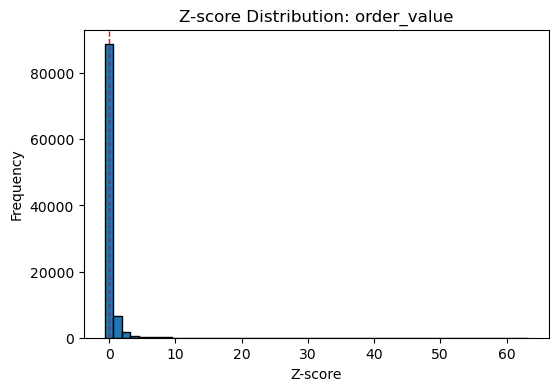

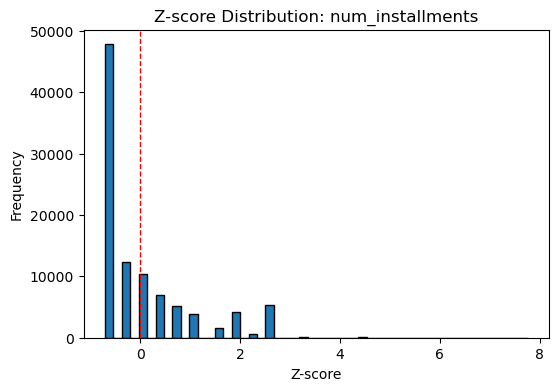

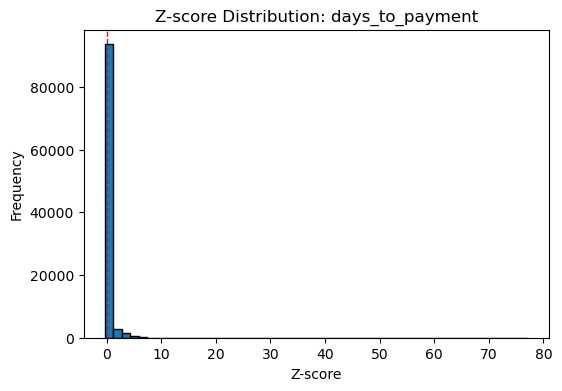

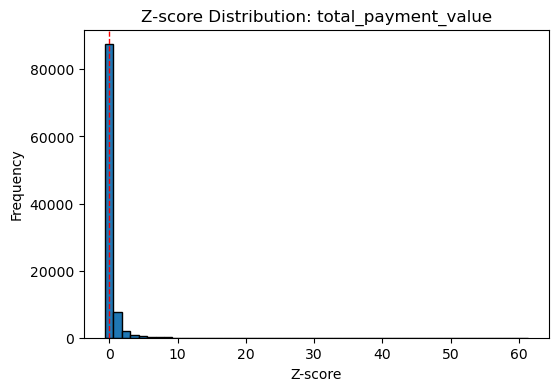

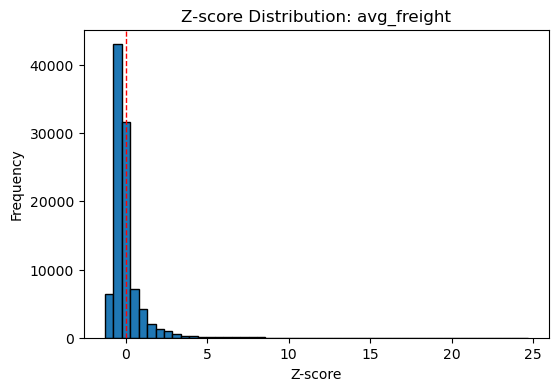

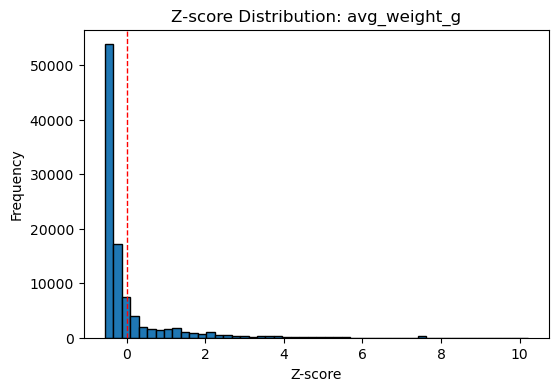

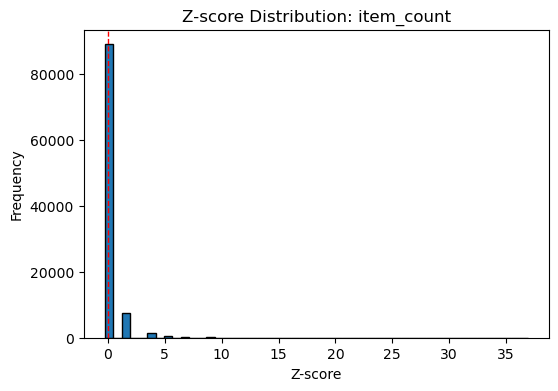

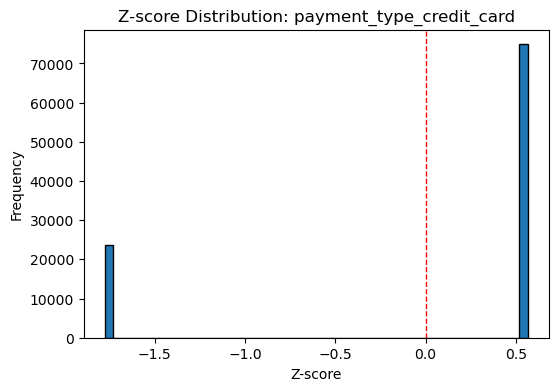

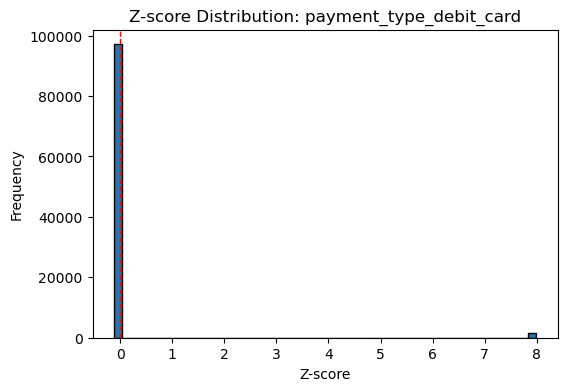

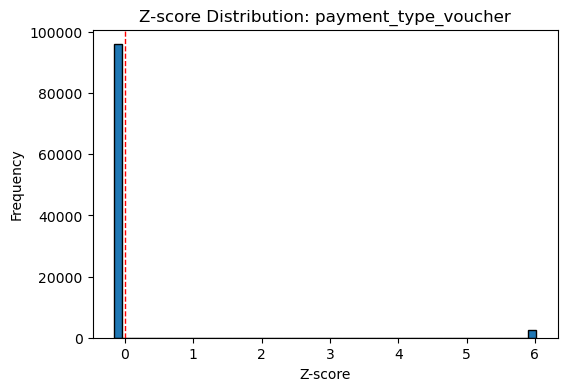

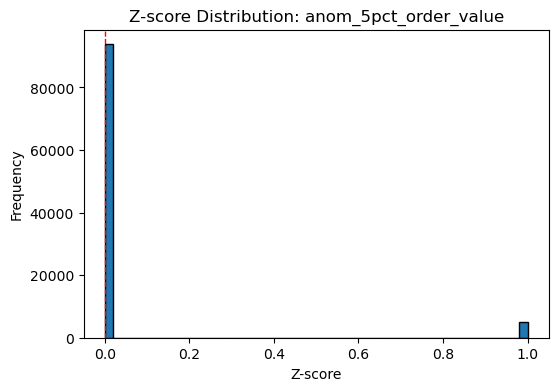

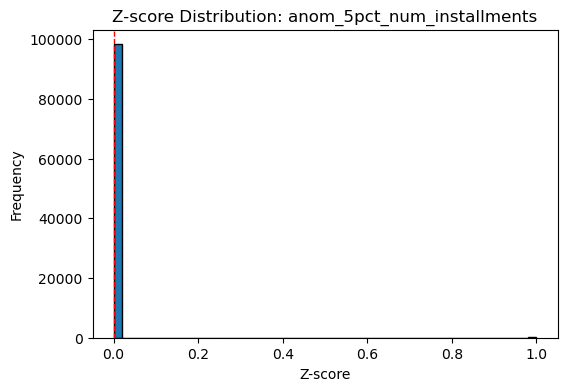

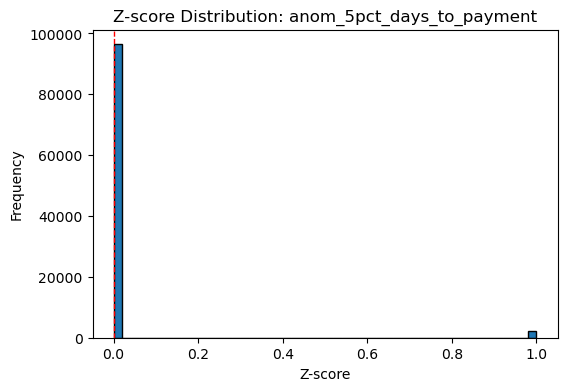

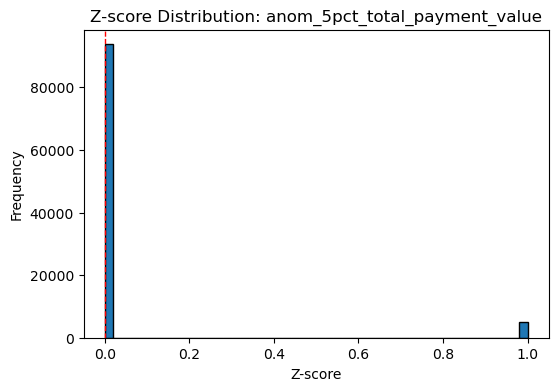

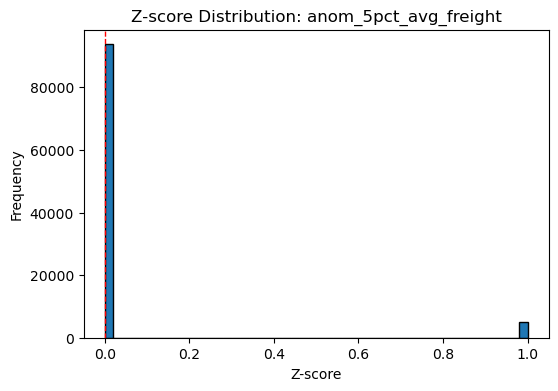

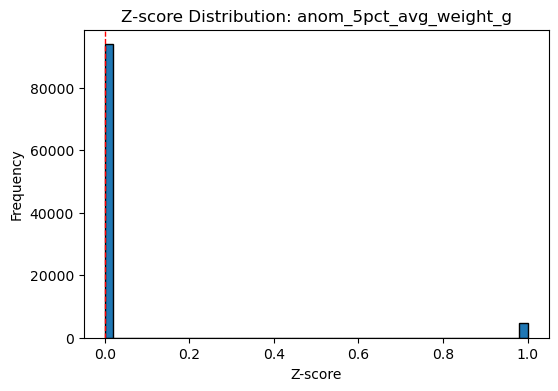

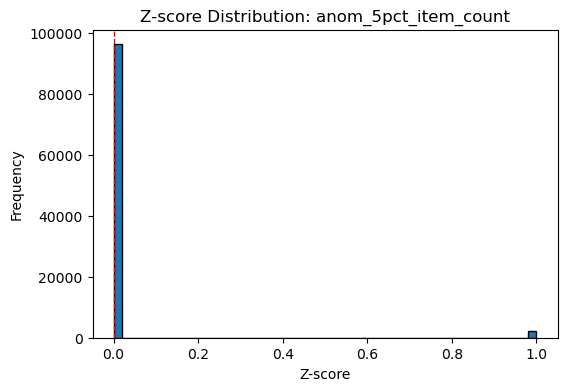

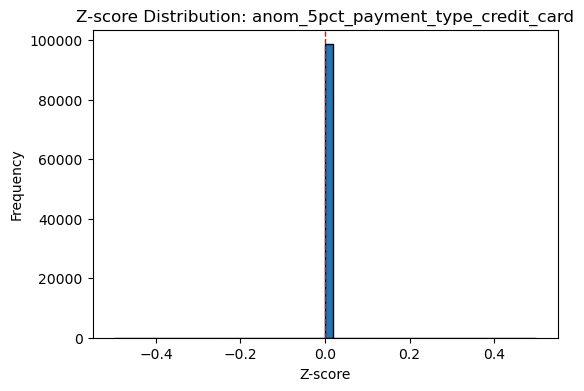

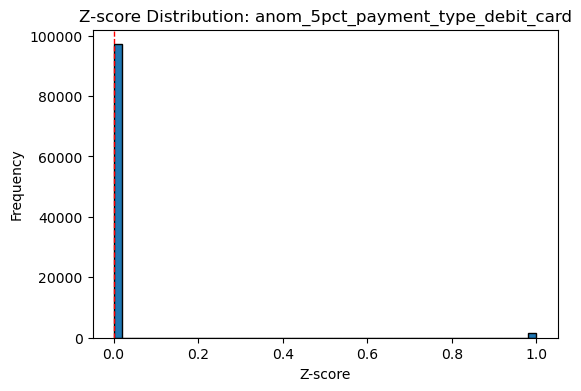

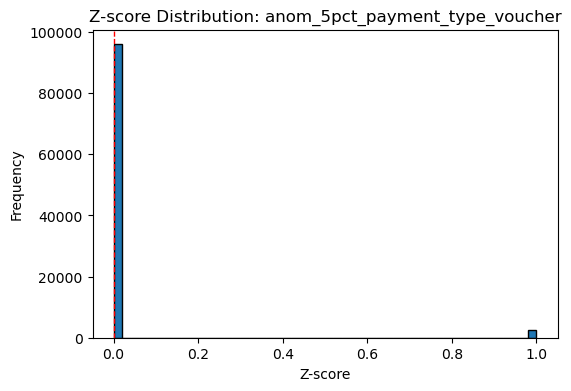

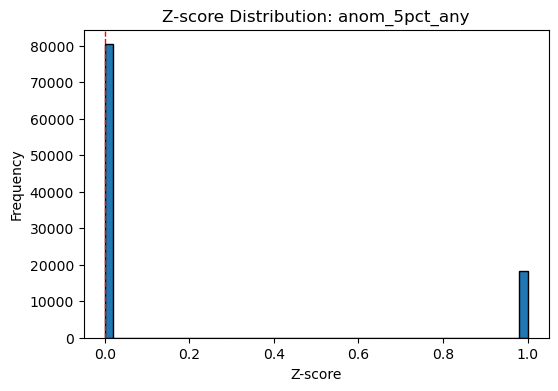

In [40]:
features = [col.replace('z_','') for col in df_zscore.columns if col.startswith('z_')]

# Plot including the 95th percentile
for feat in features:
    zcol = f'z_{feat}'
    plt.figure(figsize=(6, 4))
    plt.hist(df_zscore[zcol], bins=50, edgecolor='black')
    plt.title(f'Z-score Distribution: {feat}')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
    plt.axvline(0, color='red', linewidth=1, linestyle='--')
    plt.show()

#### PCA

In [41]:
df_clean = payment_features_clean  

base_features = [
    'num_installments',
    'days_to_payment',
    'order_value',
    'avg_freight',
    'avg_weight_g',
    'item_count',
    'distinct_categories',
    'total_payment_value'
]

payment_type_dummies = [
    col for col in df_clean.columns 
    if col.startswith('payment_type_')
]

all_features = base_features + payment_type_dummies

df_for_corr = df_clean[all_features].copy()

# Co-relation matrix
corr = df_for_corr.corr()
corr

,num_installments,days_to_payment,order_value,avg_freight,avg_weight_g,item_count,distinct_categories,total_payment_value,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
num_installments,1.000000,-0.115129,0.314178,0.211568,0.197488,0.067578,0.045925,0.320090,0.390079,-0.089035,-0.089459
days_to_payment,-0.115129,1.000000,0.015421,0.021043,0.004499,0.020109,0.003159,0.017777,-0.368952,-0.008096,-0.011976
order_value,0.314178,0.015421,1.000000,0.402603,0.332572,0.153158,0.030948,0.995968,0.047503,-0.010066,-0.025771
avg_freight,0.211568,0.021043,0.402603,1.000000,0.618928,-0.026825,-0.002150,0.463376,0.019344,-0.008696,-0.011415
avg_weight_g,0.197488,0.004499,0.332572,0.618928,1.000000,-0.005338,0.000075,0.367201,0.024474,-0.014808,-0.011320
item_count,0.067578,0.020109,0.153158,-0.026825,-0.005338,1.000000,0.216509,0.189309,-0.013305,-0.007096,-0.014697
distinct_categories,0.045925,0.003159,0.030948,-0.002150,0.000075,0.216509,1.000000,0.039868,0.001986,-0.002140,0.001654
total_payment_value,0.320090,0.017777,0.995968,0.463376,0.367201,0.189309,0.039868,1.000000,0.046047,-0.010854,-0.026158
payment_type_credit_card,0.390079,-0.368952,0.047503,0.019344,0.024474,-0.013305,0.001986,0.046047,1.000000,-0.222069,-0.294766
payment_type_debit_card,-0.089035,-0.008096,-0.010066,-0.008696,-0.014808,-0.007096,-0.002140,-0.010854,-0.222069,1.000000,-0.020775


In [42]:
# payment_features_clean.to_csv("payments_clean.csv")

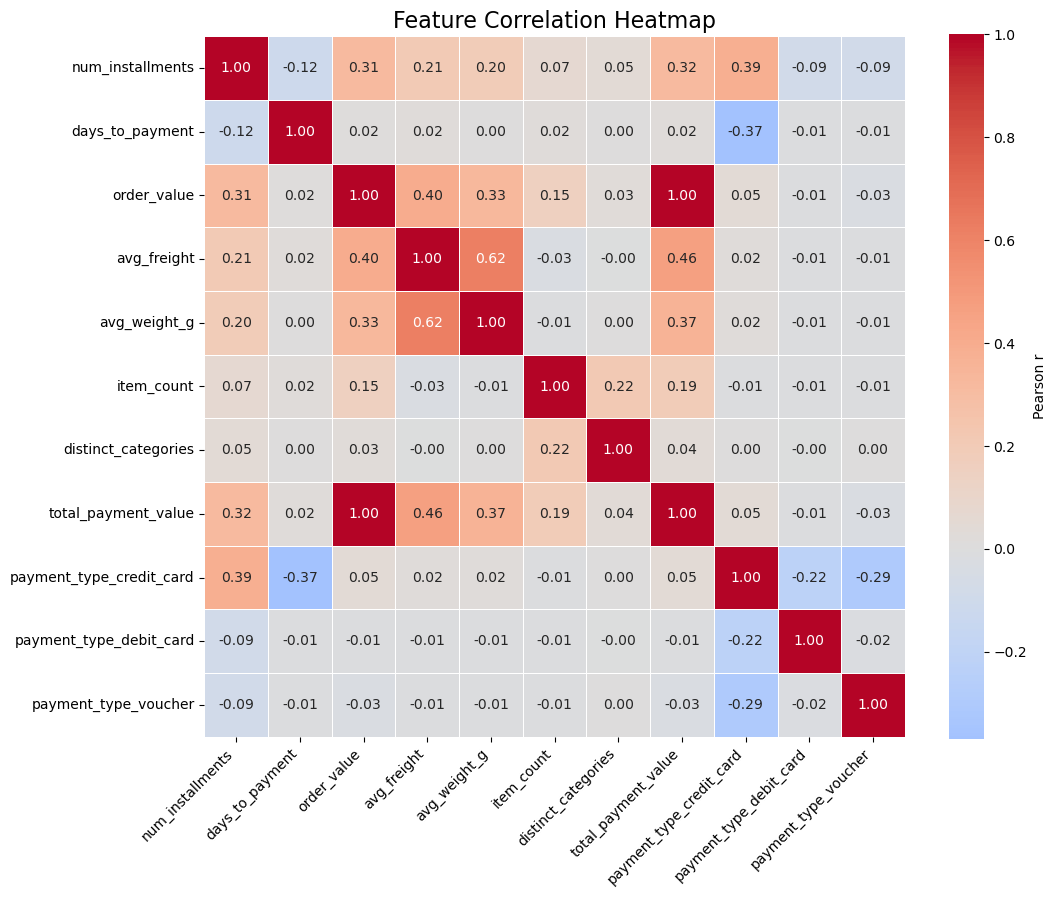

In [43]:
plt.figure(figsize=(11, 9))
sns.heatmap(
    corr,
    annot=True,              
    fmt=".2f",              
    cmap="coolwarm",        
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Pearson r"}
)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [44]:
# Dropping total_payment_value since it is highly co-related with order value
payment_features_clean = payment_features_clean.drop(
    ['total_payment_value'], axis=1
)

In [45]:
base_features = [
    'num_installments',
    'days_to_payment',
    'order_value',
    'avg_freight',
    'avg_weight_g',
    'item_count',
    'distinct_categories'
]

payment_dummies = [
    col for col in payment_features_clean.columns 
    if col.startswith('payment_type_')
]

features = base_features + payment_dummies

In [46]:
df_feat = payment_features_clean[features].copy()
df_feat = df_feat.fillna(df_feat.mean())

# Standardizing all columns
scaler = StandardScaler()
X = scaler.fit_transform(df_feat)

# Fit PCA → 2 components
pca = PCA(n_components=2, random_state=42)
X_proj = pca.fit_transform(X)

X_recon     = pca.inverse_transform(X_proj)
recon_error = np.linalg.norm(X - X_recon, axis=1)

df_pca_scores = pd.DataFrame({
    'order_id'        : payment_features_clean['order_id'],
    'pc1_score'       : X_proj[:, 0],
    'pc2_score'       : X_proj[:, 1],
    'pca_recon_error' : recon_error
})


In [47]:
df_pca_scores

,order_id,pc1_score,pc2_score,pca_recon_error
0,00010242fe8c5a6d1ba2dd792cb16214,-0.532899,-0.807293,0.467281
1,00018f77f2f0320c557190d7a144bdd3,4.032963,1.670531,6.073251
2,000229ec398224ef6ca0657da4fc703e,0.702345,-0.699211,0.568442
3,00024acbcdf0a6daa1e931b038114c75,-0.707403,-0.891190,0.453727
4,00042b26cf59d7ce69dfabb4e55b4fd9,0.488847,-0.446611,0.643329
...,...,...,...,...
98630,fffc94f6ce00a00581880bf54a75a037,1.267020,2.835513,1.539898
98631,fffcd46ef2263f404302a634eb57f7eb,0.861804,3.207437,1.778420
98632,fffce4705a9662cd70adb13d4a31832d,-0.267049,-0.214117,1.176677
98633,fffe18544ffabc95dfada21779c9644f,-0.599184,-1.038181,0.285564


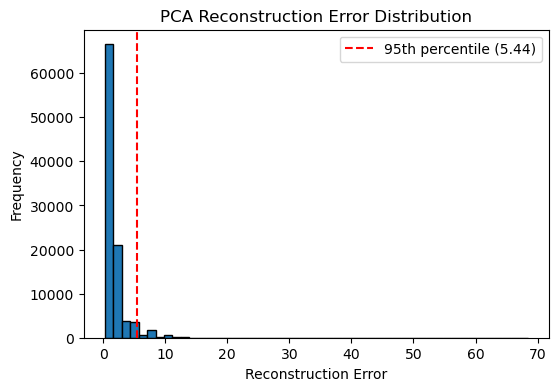

Orders flagged by PCA at 5% cutoff: 4932


In [48]:
plt.figure(figsize=(6,4))
plt.hist(recon_error, bins=50, edgecolor='black')
th = np.percentile(recon_error, 95)
plt.axvline(th, color='red', linestyle='--', label=f'95th percentile ({th:.2f})')
plt.title("PCA Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Flag anomalies
df_pca_scores['anom_5pct_pca'] = (df_pca_scores['pca_recon_error'] > th).astype(int)
print(f"Orders flagged by PCA at 5% cutoff: {df_pca_scores['anom_5pct_pca'].sum()}")

In [49]:
# Weights of features in PC1 & PC2
loadings = pd.DataFrame(
    pca.components_,      
    index=['PC1','PC2'], 
    columns=features      
)

print("PCA Component Loadings (weights):")
loadings.round(3)


PCA Component Loadings (weights):


,num_installments,days_to_payment,order_value,avg_freight,avg_weight_g,item_count,distinct_categories,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
PC1,0.427,-0.108,0.460,0.505,0.487,0.078,0.043,0.266,-0.096,-0.120
PC2,-0.261,0.432,0.179,0.310,0.293,0.016,-0.006,-0.621,0.233,0.302


In [50]:
df = payment_features_clean
# Z-score anomaly detection
Z = (
    df[features]
    .replace([np.inf, -np.inf], np.nan)
    .fillna(method='ffill')
    .apply(zscore)
)
df['zscore_max'] = Z.abs().max(axis=1)
z_th = np.percentile(df['zscore_max'], 95)
df['zscore_anomaly_flag'] = (df['zscore_max'] >= z_th).astype(int)
print("Z-Score flagged records:", df['zscore_anomaly_flag'].sum())

# PCA-distance anomaly detection
Xs = StandardScaler().fit_transform(df[features])
pca = PCA(n_components=2, random_state=42).fit(Xs)
pcs = pca.transform(Xs)
df['pca_dist'] = np.linalg.norm(pcs, axis=1)
p_th = np.percentile(df['pca_dist'], 95)
df['pca_anomaly_flag'] = (df['pca_dist'] >= p_th).astype(int)
print("PCA-Distance flagged anomalous record count:", df['pca_anomaly_flag'].sum())

Z-Score flagged records: 6687


C:\Users\Arushi\AppData\Local\Temp\ipykernel_10848\3246141454.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')


PCA-Distance flagged anomalous record count: 4932


#### Machine learning Models

#### Un-supervised Models

#### Isolation Forest

In [51]:
# Features for algorithms
base_features = [
    'num_installments',
    'days_to_payment',
    'order_value',
    'avg_freight',
    'avg_weight_g',
    'item_count',
    'distinct_categories'
]
payment_dummies = [
    col for col in payment_features_clean.columns
    if col.startswith('payment_type_')
]
features_reduced = base_features + payment_dummies

In [52]:
# Extract and scale
X = payment_features_clean[features_reduced].dropna()
idx = X.index

# Isolation Forest with 5% contamination
iso_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('iso', IsolationForest(
        n_estimators=200,
        max_samples='auto',
        contamination=0.05,   # <- flagging top 5%
        random_state=42
    ))
])

iso_pipe.fit(X)

scores = - iso_pipe.named_steps['iso'].decision_function(
    iso_pipe.named_steps['scale'].transform(X)
)

payment_features_clean.loc[idx, 'iso_score'] = scores

# Flag the top 5%
thresh_95 = np.quantile(scores, 0.95)     # 95th percentile
payment_features_clean.loc[idx, 'iso_anomaly_flag'] = (
    scores >= thresh_95
).astype(int)


print("Iso 95th‐pct threshold:", round(thresh_95,4))
print("Iso flagged anomalous rate:", 
      payment_features_clean.loc[idx, 'iso_anomaly_flag'].mean())
print(pd.Series(scores).describe())

Iso 95th‐pct threshold: -0.0
Iso flagged anomalous rate: 0.0500025345972525
count    98635.000000
mean        -0.149428
std          0.070435
min         -0.216735
25%         -0.202454
50%         -0.172048
75%         -0.125431
max          0.222162
dtype: float64


In [53]:
scores = payment_features_clean['iso_score']
quantiles = scores.quantile([0.00, 0.25, 0.50, 0.75, 0.95, 1.00])
quantile_df = quantiles.reset_index()
quantile_df.columns = ['Quantile', 'IsoScore']
print("Key quantiles of Isolation Forest scores:")
display(quantile_df.style.format({'IsoScore':'{:.4f}'}))

Key quantiles of Isolation Forest scores:


,Quantile,IsoScore
0,0.000000,-0.2167
1,0.250000,-0.2025
2,0.500000,-0.1720
3,0.750000,-0.1254
4,0.950000,-0.0000
5,1.000000,0.2222


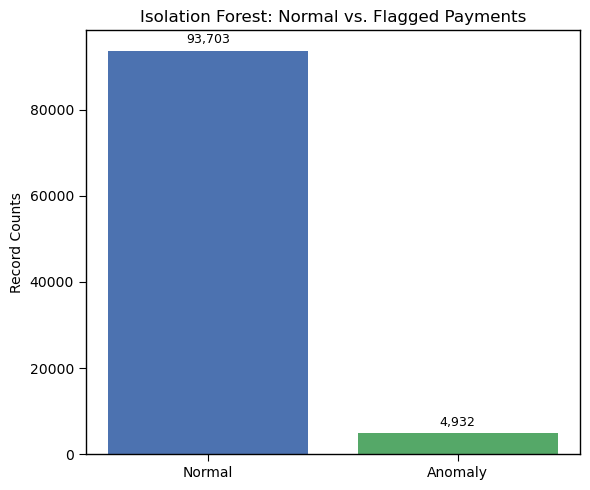

In [54]:
flag_counts = payment_features_clean['iso_anomaly_flag'].value_counts().sort_index()
labels = ['Normal', 'Anomaly']
counts = flag_counts.values

fig, ax = plt.subplots(figsize=(6, 5), facecolor='white')
ax.set_facecolor('white')

bars = ax.bar(labels, counts, color=['#4c72b0', '#55a868'])

for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(1)

ax.tick_params(axis='both', which='both', length=5, color='black')
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + max(counts)*0.01,
        f'{int(h):,}',
        ha='center', va='bottom', fontsize=9
    )

ax.set_title('Isolation Forest: Normal vs. Flagged Payments', fontsize=12)
ax.set_ylabel('Record Counts', fontsize=10)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

In [55]:
payment_dummies = [c for c in payment_features_clean.columns if c.startswith('payment_type_')]

# Map back to a single payment_type column
def invert_ohe(row):
    # find which dummy is 1
    hits = [col.replace('payment_type_','') 
            for col in payment_dummies 
            if row[col] == 1]
    if hits:
        return hits[0]
    else:
        return 'boleto'  

top10 = payment_features_clean.nlargest(10, 'iso_score').copy()
top10['payment_type'] = top10.apply(invert_ohe, axis=1)

display_cols = [
    'order_id',
    'iso_score',
    'iso_anomaly_flag',
    'payment_type',
    'num_installments',
    'days_to_payment',
    'order_value',
    'avg_freight',
    'item_count',
    'avg_weight_g',
    'category_list'
]
print("Top 10 highest-scoring anomalies:\n")
display(top10[display_cols])


Top 10 highest-scoring anomalies:



,order_id,iso_score,iso_anomaly_flag,payment_type,num_installments,days_to_payment,order_value,avg_freight,item_count,avg_weight_g,category_list
80175,cfed507ac357129f750f05a0d7d71b15,0.222162,1.0,credit_card,10,1,1380.00,237.110000,3.0,30000.0,furniture_living_room
79901,cf4659487be50c0c317cff3564c4a840,0.210453,1.0,boleto,1,2,1050.00,299.160000,6.0,18700.0,signaling_and_security
93855,f398a143c0fe171d965db2096cf064cf,0.202144,1.0,voucher,10,0,3124.00,173.400000,1.0,19300.0,health_beauty
44047,725cf8e9c24e679a8a5a32cb92c9ce1e,0.200262,1.0,credit_card,10,0,1570.00,248.710000,2.0,30000.0,health_beauty
80783,d182d98f09b4277c0d58801e991f7757,0.197617,1.0,credit_card,10,1,2499.99,127.100000,1.0,30000.0,cool_stuff
43390,70a272d1c01754b91a8709ae7efe27be,0.196264,1.0,voucher,1,0,798.00,104.000000,2.0,30000.0,furniture_living_room
4424,0b6230647ed16f4b3e70282dc4b5b87f,0.195250,1.0,credit_card,10,1,1050.00,321.880000,1.0,30000.0,health_beauty
13952,2455cbeb73fd04b170ca2504662f95ce,0.194832,1.0,boleto,1,1,419.40,167.048333,6.0,25700.0,furniture_decor
49327,80423624a58421eb6e6d9fd07cafb406,0.193926,1.0,voucher,1,0,1119.90,138.330000,1.0,30000.0,cool_stuff
91969,eea28d6b80e09bfb00dc1f0640d2de47,0.193826,1.0,debit_card,1,0,2338.08,174.450000,1.0,30000.0,housewares


In [56]:
df = payment_features_clean

# Numeric features
numeric_feats = [
    'num_installments',
    'days_to_payment',
    'order_value',
    'avg_freight',
    'avg_weight_g',
    'item_count',
    'distinct_categories'
]

# One-hot payment columns
payment_dummies = [c for c in df.columns if c.startswith('payment_type_')]

# Group by the IsolationForest flag
groups = df.groupby('iso_anomaly_flag')

# Medians of numeric features
summary_num = groups[numeric_feats].median()

#  “mode” for payment type 
ptype_means = groups[payment_dummies].mean()
# For each group, picking the dummy with largest mean
ptype_mode = ptype_means.idxmax(axis=1).str.replace('payment_type_', '')
summary_ptype = pd.DataFrame({'payment_type_mode': ptype_mode})

summary = pd.concat([summary_num, summary_ptype], axis=1)
summary.index = ['Normal (0)', 'Anomaly (1)']

print("Comparison of medians and most common payment type:\n")
display(summary)

Comparison of medians and most common payment type:



,num_installments,days_to_payment,order_value,avg_freight,avg_weight_g,item_count,distinct_categories,payment_type_mode
Normal (0),2.0,0.0,79.99,16.160000,642.0,1.0,1.0,credit_card
Anomaly (1),3.0,0.0,299.20,35.113333,6750.0,1.0,1.0,credit_card


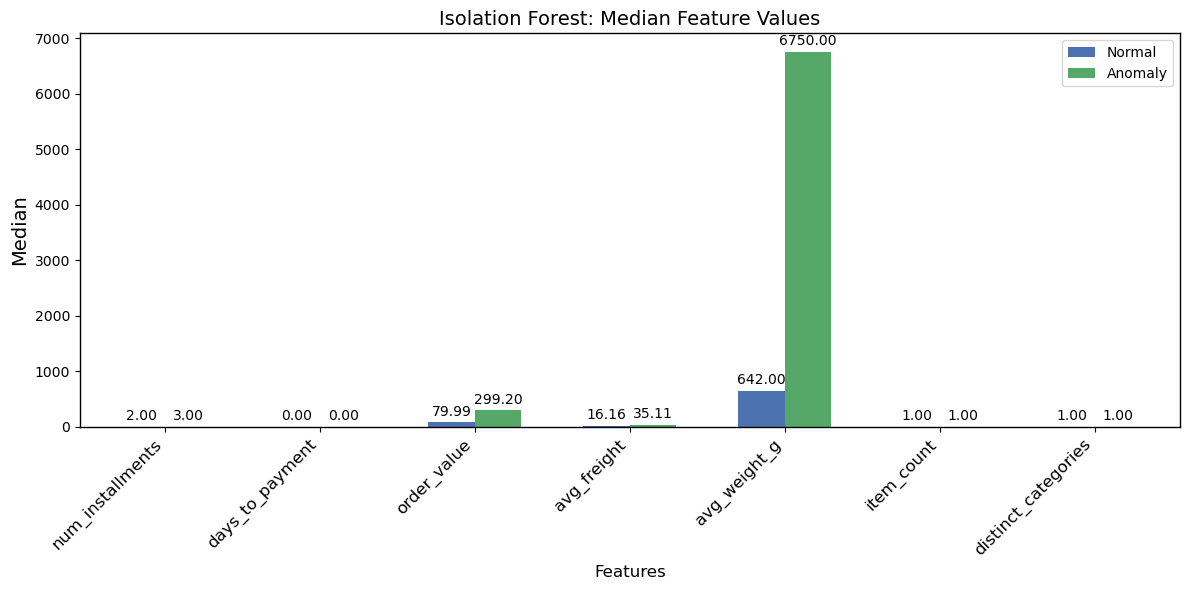

In [57]:
features = [
            'num_installments',
            'days_to_payment',
            'order_value',
            'avg_freight',
            'avg_weight_g',
            'item_count',
            'distinct_categories'
]

normal  = payment_features_clean.loc[payment_features_clean['iso_anomaly_flag']==0, features]
flagged = payment_features_clean.loc[payment_features_clean['iso_anomaly_flag']==1, features]

medians = pd.DataFrame({
    'Normal':  normal.median(),
    'Anomaly': flagged.median()
})

fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
ax.set_facecolor('white')

colors = ['#4c72b0', '#55a868']
medians.plot(
    kind='bar',
    ax=ax,
    color=colors,
    width=0.6,
    legend=True
)

ax.set_title('Isolation Forest: Median Feature Values', fontsize=14)
ax.set_ylabel('Median', fontsize=14)
ax.set_xlabel("Features", fontsize=12)

ax.set_xticklabels(medians.index, rotation=45, ha='right', fontsize=12)

max_med = medians.values.max()
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + max_med * 0.01,
        f'{h:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

for spine in ['top','right','bottom','left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(1)

plt.tight_layout()
plt.show()


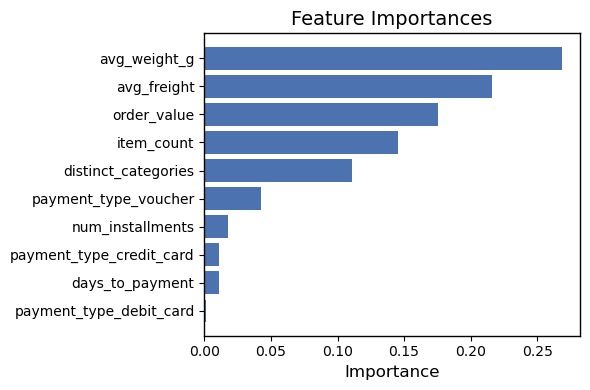

In [58]:
# Feature importance
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    random_state=42
)
rf.fit(X, payment_features_clean.loc[idx, 'iso_anomaly_flag'])

rf_imp = pd.Series(
    rf.feature_importances_,
    index=features_reduced
).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
ax.set_facecolor('white')

# horizontal bar chart
bars = ax.barh(rf_imp.index, rf_imp.values, color='#4c72b0')

ax.set_title("Feature Importances", fontsize=14)
ax.set_xlabel("Importance", fontsize=12)
ax.tick_params(axis='y', labelsize=10)

ax.grid(False)

for spine in ['top','right','bottom','left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(1)

plt.tight_layout()
plt.show()

#### LOF

In [59]:
# Split into flagged vs. normal
X = payment_features_clean[features_reduced]
idx = X.index

lof_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('lof', LocalOutlierFactor(
        n_neighbors=20,
        contamination=0.05,
        novelty=True
    ))
])

# fit the pipeline
lof_pipe.fit(X.fillna(X.median()))

# Compute anomaly scores (higher = more anomalous)
X_scaled    = lof_pipe.named_steps['scale'].transform(X.fillna(X.median()))
raw_scores  = lof_pipe.named_steps['lof'].decision_function(X_scaled)
lof_scores  = -raw_scores
payment_features_clean.loc[idx, 'lof_score'] = lof_scores

# Flag the top 5%
flags = lof_pipe.named_steps['lof'].predict(X_scaled)
payment_features_clean.loc[idx, 'lof_anomaly_flag'] = (flags == -1).astype(int)

print("LOF 95th‐pct threshold:", round(np.quantile(lof_scores, 0.95),4))
print("LOF anomalous flagged rate:", payment_features_clean.loc[idx, 'lof_anomaly_flag'].mean())
print(pd.Series(lof_scores).describe())

LOF 95th‐pct threshold: -0.0313
LOF anomalous flagged rate: 0.0426623409540224
count    9.863500e+04
mean     5.473704e+05
std      2.577635e+07
min     -4.608609e-01
25%     -3.689610e-01
50%     -3.318269e-01
75%     -2.633830e-01
max      4.402561e+09
dtype: float64


In [60]:
payment_dummies = [c for c in payment_features_clean.columns if c.startswith('payment_type_')]

def invert_ohe(row):
    hits = [col.replace('payment_type_','') for col in payment_dummies if row[col] == 1]
    return hits[0] if hits else 'boleto'

# Top 10 anomalies
top10_lof = payment_features_clean.nlargest(10, 'lof_score').copy()
top10_lof['payment_type'] = top10_lof.apply(invert_ohe, axis=1)

display_cols = [
    'order_id',
    'payment_type',
    'lof_score',
    'lof_anomaly_flag',
    'num_installments',
    'days_to_payment',
    'order_value',
    'avg_freight',
    'item_count',
    'avg_weight_g',
    'distinct_categories'
]

print("Top 10 LOF-flagged anomalies:\n")
display(top10_lof[display_cols])


Top 10 LOF-flagged anomalies:



,order_id,payment_type,lof_score,lof_anomaly_flag,num_installments,days_to_payment,order_value,avg_freight,item_count,avg_weight_g,distinct_categories
51067,84f22866255c63a5269b53fe16d592bc,credit_card,4.402561e+09,1.0,4,0,69.9,0.0,1.0,2600.0,1.0
47716,7bf6f797177e1c8cf1954065ec72d5b2,credit_card,1.507366e+09,1.0,5,0,99.9,0.0,1.0,584.0,1.0
18148,2f669a3575b067a0f0b88d47f53709c2,credit_card,1.419133e+09,1.0,4,0,199.0,0.0,1.0,342.0,1.0
21206,373dfc7dcfcc86a8ffd1933a56576ce9,credit_card,1.419133e+09,1.0,4,0,199.0,0.0,1.0,342.0,1.0
32898,5570dc7d80f99aa07875d9bf7f1db998,credit_card,1.419133e+09,1.0,4,0,199.0,0.0,1.0,342.0,1.0
38968,6541aed6de52f3a9f2cb99afe498dde4,credit_card,1.419133e+09,1.0,4,0,199.0,0.0,1.0,342.0,1.0
63324,a5283d6db4848796b9bea944339d2dca,credit_card,1.419133e+09,1.0,4,0,199.0,0.0,1.0,342.0,1.0
82456,d5af3f91478b15918f7250953622d89d,credit_card,1.419133e+09,1.0,4,0,199.0,0.0,1.0,342.0,1.0
16739,2bd6a9cea9df97f5f2d0717bb6307f32,credit_card,1.303437e+09,1.0,1,0,53.9,0.0,1.0,1550.0,1.0
17615,2e120d53ec1baa3432c6af11aa2b930c,credit_card,1.303437e+09,1.0,1,0,53.9,0.0,1.0,1550.0,1.0


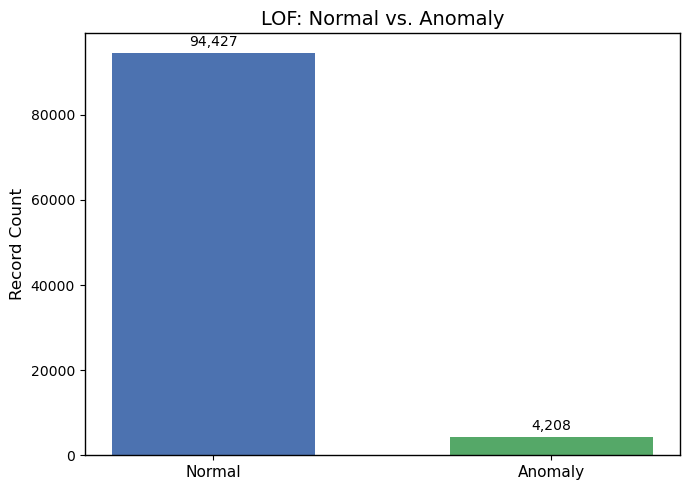

In [61]:
flag_counts_lof = payment_features_clean['lof_anomaly_flag'] \
    .value_counts().sort_index()
labels = ['Normal', 'Anomaly']
counts = flag_counts_lof.values

fig, ax = plt.subplots(figsize=(7, 5), facecolor='white')
ax.set_facecolor('white')

colors = ['#4c72b0', '#55a868']
bars = ax.bar(labels, counts, color=colors, width=0.6)


for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(1)

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, fontsize=11)
ax.set_ylabel('Record Count', fontsize=12)
ax.set_title('LOF: Normal vs. Anomaly', fontsize=14)

max_count = counts.max()
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + max_count * 0.01,
        f'{int(h):,}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [62]:
df = payment_features_clean

numeric_feats = [
    'num_installments',
    'days_to_payment',
    'order_value',
    'avg_freight',
    'avg_weight_g',
    'item_count',
    'distinct_categories'
]

payment_dummies = [c for c in df.columns if c.startswith('payment_type_')]

# group by LOF anomaly flag
groups = df.groupby('lof_anomaly_flag')

# medians of numeric features
summary_num = groups[numeric_feats].median()

# most common payment type per group
ptype_means = groups[payment_dummies].mean()
ptype_mode = ptype_means.idxmax(axis=1).str.replace('payment_type_', '')
summary_ptype = pd.DataFrame({'payment_type_mode': ptype_mode})


summary = pd.concat([summary_num, summary_ptype], axis=1)
summary.index = ['Normal (0)', 'Anomaly (1)']

print("Comparison of medians and most common payment type:\n")
display(summary)

Comparison of medians and most common payment type:



,num_installments,days_to_payment,order_value,avg_freight,avg_weight_g,item_count,distinct_categories,payment_type_mode
Normal (0),2.0,0.0,86.99,16.40,700.0,1.0,1.0,credit_card
Anomaly (1),1.0,0.0,79.90,15.61,750.0,1.0,1.0,credit_card


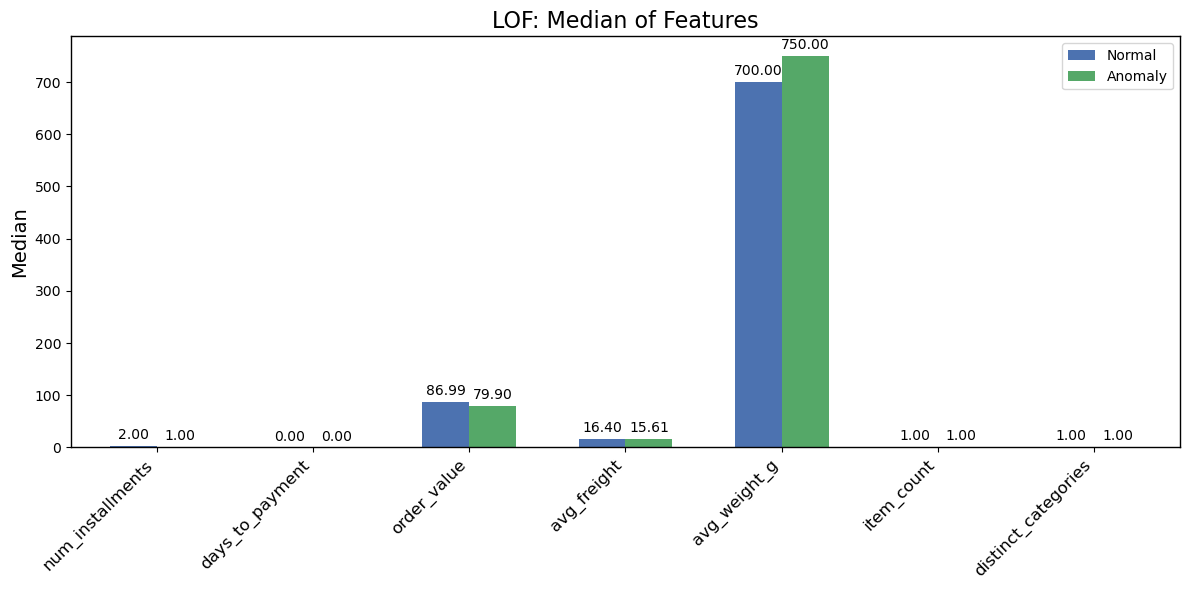

In [63]:
normal_lof  = payment_features_clean.query('lof_anomaly_flag == 0')[features]
flagged_lof = payment_features_clean.query('lof_anomaly_flag == 1')[features]

medians_lof = pd.DataFrame({
    'Normal':  normal_lof.median(),
    'Anomaly': flagged_lof.median()
}).loc[features] 

fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
ax.set_facecolor('white')

# plot bars
colors = ['#4c72b0', '#55a868']
medians_lof.plot(
    kind='bar', 
    ax=ax,
    color=colors, 
    width=0.6,
    legend=True
)

ax.set_title('LOF: Median of Features', fontsize=16)
ax.set_ylabel('Median', fontsize=14)
ax.set_xticklabels(features, rotation=45, ha='right', fontsize=12)

for spine in ['top','right','bottom','left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(1)

# annotate each bar
max_med = medians_lof.values.max()
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + max_med * 0.01,
        f'{h:.2f}',
        ha='center', va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [64]:
ct = pd.crosstab(
    payment_features_clean['iso_anomaly_flag'],
    payment_features_clean['lof_anomaly_flag'],
    rownames=['IsolationForest Flag'],
    colnames=['LOF Flag'],
    normalize='index'
)
print("Cross-tab of IF vs LOF flags:")
display(ct.style.format("{:.2f}"))

Cross-tab of IF vs LOF flags:


LOF Flag,0.000000,1.000000
IsolationForest Flag,,
0.000000,0.97,0.03
1.000000,0.78,0.22


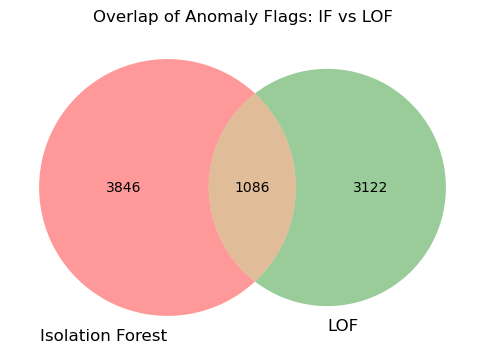

In [65]:
if_set  = set(payment_features_clean.loc[payment_features_clean['iso_anomaly_flag']==1, 'order_id'])
lof_set = set(payment_features_clean.loc[payment_features_clean['lof_anomaly_flag']==1, 'order_id'])

plt.figure(figsize=(6,6))
venn2([if_set, lof_set], set_labels=('Isolation Forest', 'LOF'))
plt.title('Overlap of Anomaly Flags: IF vs LOF')
plt.show()

#### K-means

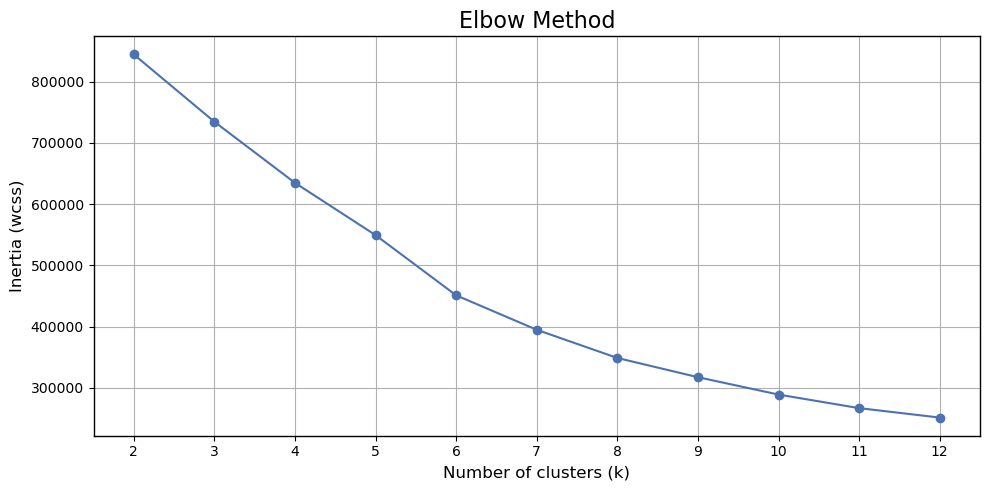

In [66]:
base_features = [
    'num_installments',
    'days_to_payment',
    'order_value',
    'avg_freight',
    'avg_weight_g',
    'item_count',
    'distinct_categories'
]
payment_dummies = [c for c in payment_features_clean.columns if c.startswith('payment_type_')]
features_km = base_features + payment_dummies

# extract and scale
X = payment_features_clean[features_km].dropna().values
X_scaled = StandardScaler().fit_transform(X)

# compute inertia for k=2…12
ks = range(2, 13)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# plot elbow curve
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white')
ax.set_facecolor('white')
ax.plot(ks, inertias, marker='o', linestyle='-', color='#4c72b0')

for spine in ['top','right','bottom','left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(1)

ax.set_xticks(ks)
ax.set_xlabel('Number of clusters (k)', fontsize=12)
ax.set_ylabel('Inertia (wcss)', fontsize=12)
ax.set_title('Elbow Method', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

In [67]:
X      = payment_features_clean[features_km].dropna()
idx    = X.index
X_scaled = StandardScaler().fit_transform(X)

# Fit K-Means with k=5
k_opt = 5
km = KMeans(n_clusters=k_opt, random_state=42, n_init=10).fit(X_scaled)

# Compute distance to assigned centroid as anomaly score
dists = np.linalg.norm(X_scaled - km.cluster_centers_[km.labels_], axis=1)

# Attach labels, scores, and flag top 5%
payment_features_clean.loc[idx, 'kmeans_label']        = km.labels_
payment_features_clean.loc[idx, 'kmeans_dist']         = dists
cutoff = np.percentile(dists, 95)
payment_features_clean.loc[idx, 'kmeans_anomaly_flag'] = (dists >= cutoff).astype(int)

print(f"Chosen k = {k_opt}")
print(f"Distance cutoff (95th pct): {cutoff:.2f}")
print(f"Flagged rate: {payment_features_clean.loc[idx,'kmeans_anomaly_flag'].mean():.2%}")

Chosen k = 5
Distance cutoff (95th pct): 3.94
Flagged rate: 5.00%


In [68]:
payment_dummies = [c for c in payment_features_clean.columns if c.startswith('payment_type_')]
def invert_ohe(row):
    hits = [col.replace('payment_type_','') for col in payment_dummies if row[col] == 1]
    return hits[0] if hits else 'boleto'

display_cols = [
    'order_id',
    'payment_type',
    'kmeans_dist',
    'num_installments',
    'days_to_payment',
    'order_value',
    'avg_freight',
    'item_count',
    'avg_weight_g',
    'distinct_categories'
]

top10_km = payment_features_clean.nlargest(10, 'kmeans_dist').copy()
top10_km['payment_type'] = top10_km.apply(invert_ohe, axis=1)

print("\nTop 10 KMeans anomalies:")
display(top10_km[display_cols])


Top 10 KMeans anomalies:


,order_id,payment_type,kmeans_dist,num_installments,days_to_payment,order_value,avg_freight,item_count,avg_weight_g,distinct_categories
17738,2e5dc86c8c4aa663549caf5e31de840d,boleto,76.207945,1,60,249.92,25.000000,2.0,250.00000,1.0
1455,03caa2c082116e1d31e67e9ae3700499,credit_card,62.781403,1,3,13440.00,28.010000,8.0,750.00000,1.0
17778,2e7a8482f6fb09756ca50c10d7bfc047,credit_card,40.156959,1,32,72.89,31.670000,2.0,1600.00000,1.0
88754,e5fa5a7210941f7d56d0208e4e071d35,credit_card,40.125671,3,32,59.50,15.560000,1.0,700.00000,1.0
95371,f7923db0430587601c2aef15ec4b8af4,credit_card,37.928313,1,30,348.00,21.100000,4.0,2400.00000,1.0
4120,0a93b40850d3f4becf2f276666e01340,boleto,37.474771,1,30,22.90,15.100000,1.0,300.00000,1.0
50123,8272b63d03f5f79c56e9e4120aec44ef,credit_card,36.923073,2,1,31.80,7.827143,21.0,809.52381,1.0
10456,1b15974a0141d54e36626dca3fdc731a,boleto,35.971950,1,1,2000.00,10.120000,20.0,360.00000,1.0
28152,490291524fddde2b31c2e6bec3d9e6da,debit_card,35.824818,1,28,26.69,17.780000,1.0,500.00000,1.0
65696,ab14fdcfbe524636d65ee38360e22ce8,credit_card,35.807583,4,1,1974.00,14.440000,20.0,1400.00000,1.0


In [69]:
payment_dummies = [c for c in df.columns if c.startswith('payment_type_')]

ptype_means = df.groupby('kmeans_label')[payment_dummies].mean()
ptype_mode  = (
    ptype_means
    .idxmax(axis=1)
    .str.replace('payment_type_', '')
    .rename('payment_type_mode')
)


cluster_medians = (
    df.groupby('kmeans_label')[features_km]
      .median()
      .add_suffix('_median')
)
cluster_sizes = (
    df['kmeans_label']
      .value_counts()
      .sort_index()
      .rename('size')
)
cluster_anom = (
    df.groupby('kmeans_label')['kmeans_anomaly_flag']
      .mean()
      .rename('anom_rate')
)

cluster_summary = pd.concat(
    [cluster_sizes, cluster_anom, ptype_mode, cluster_medians],
    axis=1
)

print("Cluster summary (size, anomaly rate, payment type mode, medians):")
display(cluster_summary)


Cluster summary (size, anomaly rate, payment type mode, medians):


,size,anom_rate,payment_type_mode,num_installments_median,days_to_payment_median,order_value_median,avg_freight_median,avg_weight_g_median,item_count_median,distinct_categories_median,payment_type_credit_card_median,payment_type_debit_card_median,payment_type_voucher_median
kmeans_label,,,,,,,,,,,,,
0.0,19207,0.062946,credit_card,1.0,1.0,69.990,16.01,600.0,1.0,1.0,0.0,0.0,0.0
1.0,2637,0.049678,voucher,1.0,0.0,64.900,15.82,600.0,1.0,1.0,0.0,0.0,1.0
2.0,69176,0.021958,credit_card,2.0,0.0,82.990,16.11,600.0,1.0,1.0,1.0,0.0,0.0
3.0,6100,0.325574,credit_card,6.0,0.0,327.075,50.08,11600.0,1.0,1.0,1.0,0.0,0.0
4.0,1515,0.057426,debit_card,1.0,0.0,69.990,15.31,534.0,1.0,1.0,0.0,1.0,0.0


In [70]:
# Cluster‐level summary: size, anomaly rate, median feature values
df = payment_features_clean  

# Compute median per cluster
cluster_medians = df.groupby('kmeans_label')[features_km].median().add_suffix('_median')
cluster_sizes   = df['kmeans_label'].value_counts().sort_index().rename('size')
cluster_anom    = df.groupby('kmeans_label')['kmeans_anomaly_flag'].mean().rename('anom_rate')

cluster_summary = pd.concat([cluster_sizes, cluster_anom, cluster_medians], axis=1)
print("Cluster summary (size, anomaly rate, medians):")
display(cluster_summary)

Cluster summary (size, anomaly rate, medians):


,size,anom_rate,num_installments_median,days_to_payment_median,order_value_median,avg_freight_median,avg_weight_g_median,item_count_median,distinct_categories_median,payment_type_credit_card_median,payment_type_debit_card_median,payment_type_voucher_median
kmeans_label,,,,,,,,,,,,
0.0,19207,0.062946,1.0,1.0,69.990,16.01,600.0,1.0,1.0,0.0,0.0,0.0
1.0,2637,0.049678,1.0,0.0,64.900,15.82,600.0,1.0,1.0,0.0,0.0,1.0
2.0,69176,0.021958,2.0,0.0,82.990,16.11,600.0,1.0,1.0,1.0,0.0,0.0
3.0,6100,0.325574,6.0,0.0,327.075,50.08,11600.0,1.0,1.0,1.0,0.0,0.0
4.0,1515,0.057426,1.0,0.0,69.990,15.31,534.0,1.0,1.0,0.0,1.0,0.0


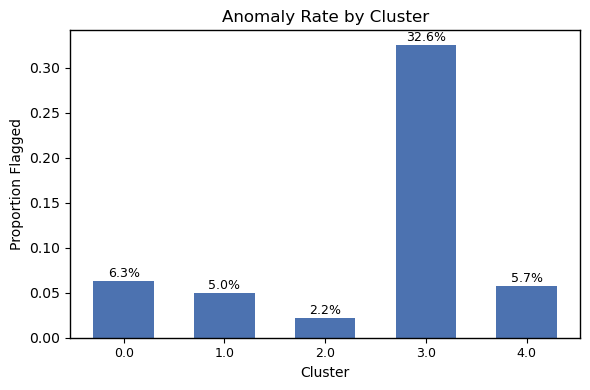

In [71]:
df = payment_features_clean.copy()

cluster_summary = pd.concat([
    df['kmeans_label'].value_counts().sort_index().rename('size'),
    df.groupby('kmeans_label')['kmeans_anomaly_flag'].mean().rename('anom_rate')
], axis=1)

rates = cluster_summary['anom_rate']
labels = rates.index.astype(str)

fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
ax.set_facecolor('white')

bars = ax.bar(labels, rates, color='#4c72b0', width=0.6)

for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.001,
        f'{h:.1%}',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.set_title('Anomaly Rate by Cluster', fontsize=12)
ax.set_xlabel('Cluster', fontsize=10)
ax.set_ylabel('Proportion Flagged', fontsize=10)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, fontsize=9)

for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(1)

plt.tight_layout()
plt.show()


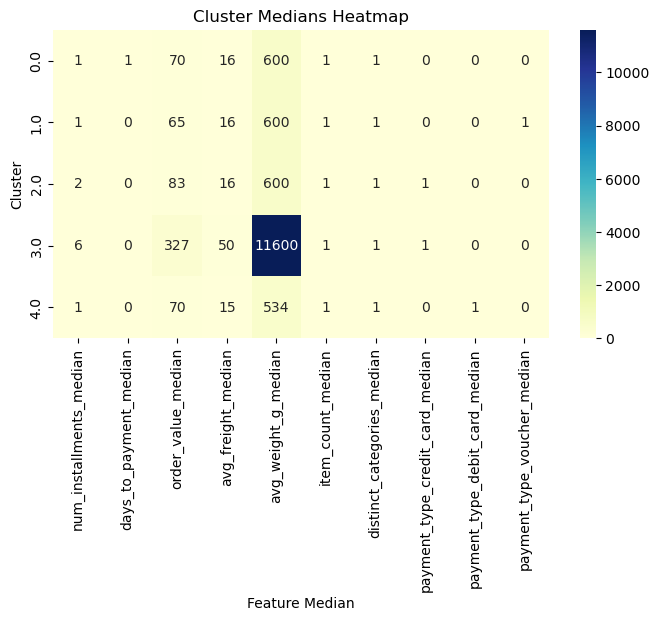

In [72]:
cluster_medians = df.groupby('kmeans_label')[features_km].median().add_suffix('_median')
cluster_sizes   = df['kmeans_label'].value_counts().sort_index().rename('size')
cluster_anom    = df.groupby('kmeans_label')['kmeans_anomaly_flag'].mean().rename('anom_rate')

cluster_summary = pd.concat([cluster_sizes, cluster_anom, cluster_medians], axis=1)
meds = cluster_summary.filter(like='_median')  

plt.figure(figsize=(8,4))
sns.heatmap(
    meds, 
    annot=True,     
    fmt=".0f",      
    cmap="YlGnBu"  
)
plt.title("Cluster Medians Heatmap")
plt.ylabel("Cluster")
plt.xlabel("Feature Median")
plt.show()

In [73]:
df = payment_features_clean.dropna(
    subset=['iso_anomaly_flag','lof_anomaly_flag','kmeans_anomaly_flag']
)

cmp = df[[
    'order_id',
    'iso_anomaly_flag',
    'lof_anomaly_flag',
    'kmeans_anomaly_flag',
    'kmeans_label'
]].copy()


In [74]:
# For each KMeans cluster, the % flagged by each method
rates = cmp.groupby('kmeans_label')[
    ['iso_anomaly_flag','lof_anomaly_flag','kmeans_anomaly_flag']
].mean().rename(columns={
    'iso_anomaly_flag':  'IF_rate',
    'lof_anomaly_flag':  'LOF_rate',
    'kmeans_anomaly_flag':'KM_rate'
})

print("Anomaly-rates within each KMeans cluster:")
display(rates.style.format('{:.1%}'))

Anomaly-rates within each KMeans cluster:


,IF_rate,LOF_rate,KM_rate
kmeans_label,,,
0.000000,3.6%,4.2%,6.3%
1.000000,30.3%,12.7%,5.0%
2.000000,0.9%,3.6%,2.2%
3.000000,40.0%,6.1%,32.6%
4.000000,22.4%,13.1%,5.7%


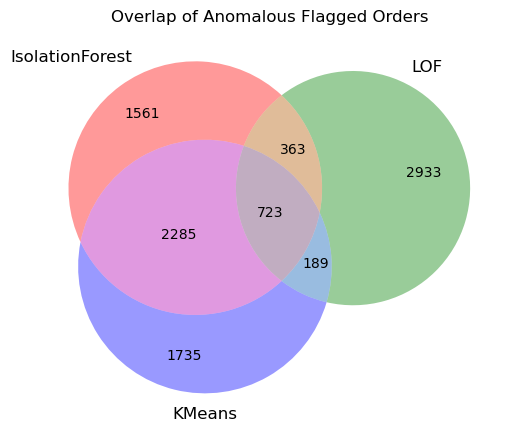

In [75]:
s_if   = set(cmp.loc[cmp['iso_anomaly_flag']==1,   'order_id'])
s_lof  = set(cmp.loc[cmp['lof_anomaly_flag']==1,   'order_id'])
s_km   = set(cmp.loc[cmp['kmeans_anomaly_flag']==1,'order_id'])

plt.figure(figsize=(6,6))
venn3([s_if, s_lof, s_km], ('IsolationForest','LOF','KMeans'))
plt.title('Overlap of Anomalous Flagged Orders')
plt.show()

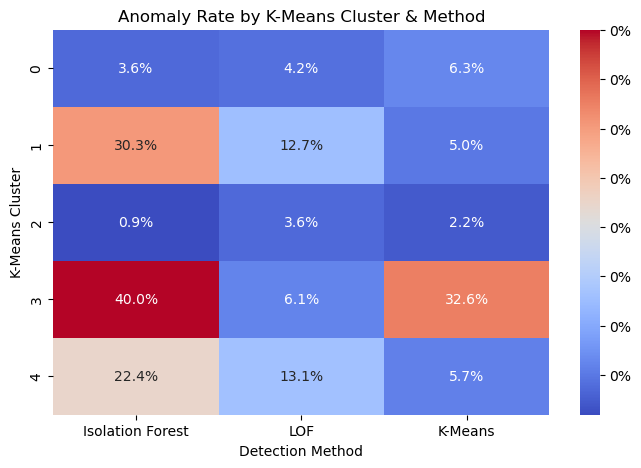

In [76]:
rates = payment_features_clean.groupby('kmeans_label')[
    ['iso_anomaly_flag', 'lof_anomaly_flag', 'kmeans_anomaly_flag']
].mean()

rates.index = rates.index.astype(int)
rates.columns = ['Isolation Forest', 'LOF', 'K-Means']

plt.figure(figsize=(8, 5))
sns.heatmap(
    rates,
    annot=True,
    fmt=".1%", 
    cmap="coolwarm",
    cbar_kws={'format': '%.0f%%'}
)
plt.title('Anomaly Rate by K-Means Cluster & Method')
plt.ylabel('K-Means Cluster')
plt.xlabel('Detection Method')
plt.show()


#### Model Explainability

#### SHAP for Isolation Forest

In [77]:
# Extract fitted model and scaler
iso_model = iso_pipe.named_steps['iso']
scaler = iso_pipe.named_steps['scale']

# Subset the same features used during model fitting
sample_df = payment_features_clean[features_reduced].dropna()
sample_df = sample_df.sample(n=1000, random_state=42)  # optional subsample

# Scale the features
Xsamp = scaler.transform(sample_df)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(iso_model)

# Compute SHAP values
shap_values = explainer.shap_values(Xsamp)

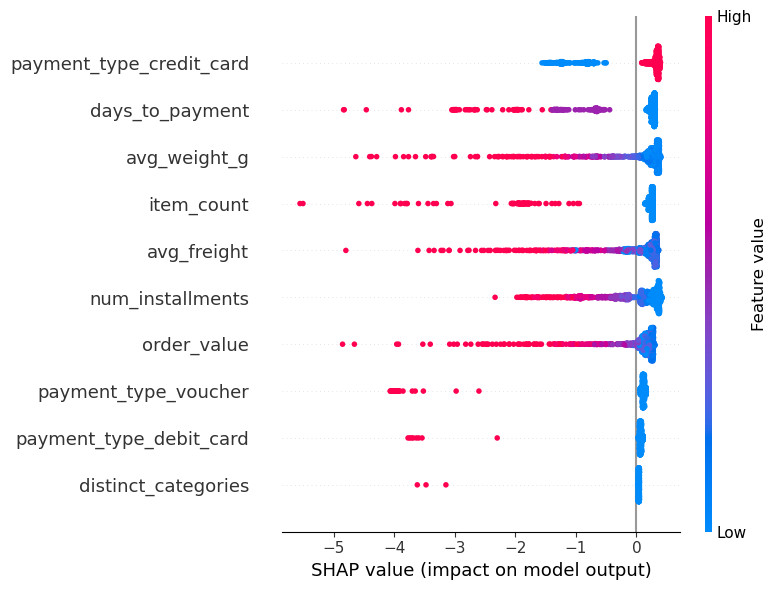

In [78]:
shap.summary_plot(
    shap_values,
    features=sample_df,
    feature_names=features_reduced,
    plot_size=(8, 6)
)


In [79]:
# Convert to DataFrame
shap_df = pd.DataFrame(shap_values, columns=features_reduced)

# Calculate mean and std of absolute SHAP values
summary_df = pd.DataFrame({
    'feature': features_reduced,
    'mean_abs_shap': np.abs(shap_df).mean().values,
    'std_abs_shap': np.abs(shap_df).std().values
}).sort_values('mean_abs_shap', ascending=False)

display(summary_df.head(10))


,feature,mean_abs_shap,std_abs_shap
7,payment_type_credit_card,0.490756,0.332977
1,days_to_payment,0.468753,0.568001
4,avg_weight_g,0.434210,0.561289
5,item_count,0.426405,0.629540
3,avg_freight,0.401420,0.509087
0,num_installments,0.393501,0.368165
2,order_value,0.316541,0.513426
9,payment_type_voucher,0.232976,0.665217
8,payment_type_debit_card,0.093180,0.308963
6,distinct_categories,0.049937,0.184933


#### LIME for LOF

In [80]:
# Copy & sort data
df = payment_features_clean.copy()
df = df.sort_values('order_id').reset_index(drop=True)

# Prepare raw feature matrix
X_raw = df[features_reduced].dropna().astype(np.float64).values

# Fix scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Re-initialize LOF with fixed settings
from sklearn.neighbors import LocalOutlierFactor

lof_model = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.05,
    novelty=True
)
lof_model.fit(X_scaled)
lof_scores = -lof_model.decision_function(X_scaled)

# Get top 5 anomalous instances
top5_idxs = np.argsort(lof_scores)[-5:][::-1]

# Build LIME explainer with fixed discretization strategy
explainer = LimeTabularExplainer(
    training_data=X_raw,
    feature_names=features_reduced,
    mode='regression',
    discretize_continuous=True,
    discretizer='quartile',     
    random_state=42
)

# Wrapper function for LIME scoring
def lof_score_fn(raw_X):
    scaled = scaler.transform(raw_X.astype(np.float64))
    return (-lof_model.decision_function(scaled)).reshape(-1, 1)

# Extract top-2 features for top-5 anomalies
results = []
for idx in top5_idxs:
    exp = explainer.explain_instance(
        X_raw[idx],
        lof_score_fn,
        num_features=2
    )
    f1, w1 = exp.as_list()[0]
    f2, w2 = exp.as_list()[1]
    results.append({
        'order_id': df.iloc[idx]['order_id'],
        'lof_score': lof_scores[idx],
        'feature_1': f1,
        'weight_1': w1,
        'feature_2': f2,
        'weight_2': w2
    })

summary_df = pd.DataFrame(results)
summary_df

,order_id,lof_score,feature_1,weight_1,feature_2,weight_2
0,84f22866255c63a5269b53fe16d592bc,4.402561e+09,2.00 < num_installments <= 4.00,6.283714e+06,avg_freight <= 13.37,4.690502e+06
1,7bf6f797177e1c8cf1954065ec72d5b2,1.507366e+09,num_installments > 4.00,1.788787e+06,86.90 < order_value <= 149.90,1.602277e+06
2,373dfc7dcfcc86a8ffd1933a56576ce9,1.419133e+09,order_value > 149.90,-2.290443e+07,avg_freight <= 13.37,-2.265751e+07
3,2f669a3575b067a0f0b88d47f53709c2,1.419133e+09,2.00 < num_installments <= 4.00,1.974983e+06,300.00 < avg_weight_g <= 700.00,1.553245e+06
4,d5af3f91478b15918f7250953622d89d,1.419133e+09,300.00 < avg_weight_g <= 700.00,9.434038e+07,order_value > 149.90,-2.946122e+07


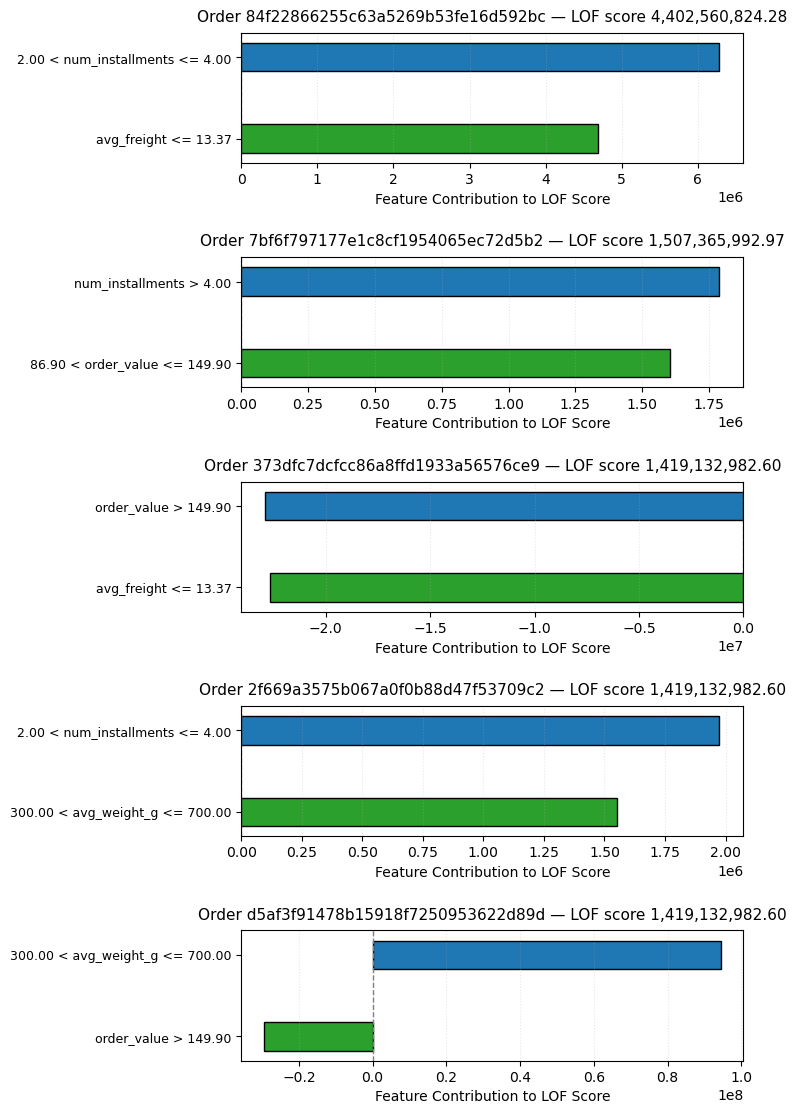

In [81]:
n = len(summary_df)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, n*2.3), facecolor='white')
if n == 1:
    axes = [axes]

for ax, (_, row) in zip(axes, summary_df.iterrows()):
    feats   = [row['feature_1'], row['feature_2']]
    weights = [row['weight_1'], row['weight_2']]
    y_pos   = [1, 0]

    ax.barh(
        y=y_pos,
        width=weights,
        height=0.35,
        color=['#1f77b4', '#2ca02c'],
        edgecolor='black'
    )

    ax.set_yticks(y_pos)
    ax.set_yticklabels(feats)
    ax.axvline(0, color='gray', linewidth=1, linestyle='--')
    ax.set_ylim(-0.3, 1.3)

    ax.set_title(
        f"Order {row['order_id']} — LOF score {row['lof_score']:,.2f}",
        fontsize=11,
        pad=8
    )

    ax.set_xlabel("Feature Contribution to LOF Score", fontsize=10)
    ax.grid(axis='x', linestyle=':', alpha=0.3)
    ax.tick_params(axis='y', labelsize=9)

plt.tight_layout(pad=2)
plt.show()


#### LIME for K-Means

In [82]:
X_df     = payment_features_clean[features_reduced].dropna()
orig_idx = X_df.index
X_raw    = X_df.values
X_scaled = scaler.transform(X_raw)

# Compute distance-to-centroid for every point
labels    = km.predict(X_scaled)
centroids = km.cluster_centers_[labels]
dists     = np.linalg.norm(X_scaled - centroids, axis=1)

# Build a LIME explainer 
explainer = LimeTabularExplainer(
    X_raw,
    feature_names=features_reduced,
    mode='regression',
    discretize_continuous=True
)

def kmeans_dist_fn(raw_X):
    scaled = scaler.transform(raw_X)
    lbls   = km.predict(scaled)
    cents  = km.cluster_centers_[lbls]
    return np.linalg.norm(scaled - cents, axis=1).reshape(-1,1)

rows = []
for cluster in sorted(np.unique(labels)):
    idxs = np.where(labels == cluster)[0]
    if idxs.size == 0:
        continue
    rep_i = idxs[np.argmax(dists[idxs])]
    df_i  = orig_idx[rep_i]
    order_id = payment_features_clean.at[df_i, 'order_id']

    exp = explainer.explain_instance(
        X_raw[rep_i],
        kmeans_dist_fn,
        num_features=2
    )
    (f1, w1), (f2, w2) = exp.as_list()
    rows.append({
        'cluster':     cluster,
        'order_id':    order_id,
        'kmeans_dist': dists[rep_i],
        'feature_1':   f1,    'weight_1': w1,
        'feature_2':   f2,    'weight_2': w2
    })

summary_df = pd.DataFrame(rows)
summary_df

,cluster,order_id,kmeans_dist,feature_1,weight_1,feature_2,weight_2
0,0,2e5dc86c8c4aa663549caf5e31de840d,76.207945,item_count > 1.00,0.400664,days_to_payment > 0.00,0.291211
1,1,241adc087f5732067fc042dceb9cc6da,13.945430,item_count <= 1.00,-0.269374,days_to_payment > 0.00,0.154810
2,2,8272b63d03f5f79c56e9e4120aec44ef,36.923073,item_count > 1.00,0.336229,days_to_payment > 0.00,0.176788
3,3,03caa2c082116e1d31e67e9ae3700499,62.781403,item_count > 1.00,0.380513,days_to_payment > 0.00,0.240457
4,4,d2f270487125ddc41fd134c4003ad1d7,20.439068,item_count > 1.00,0.268428,order_value > 149.90,0.180705


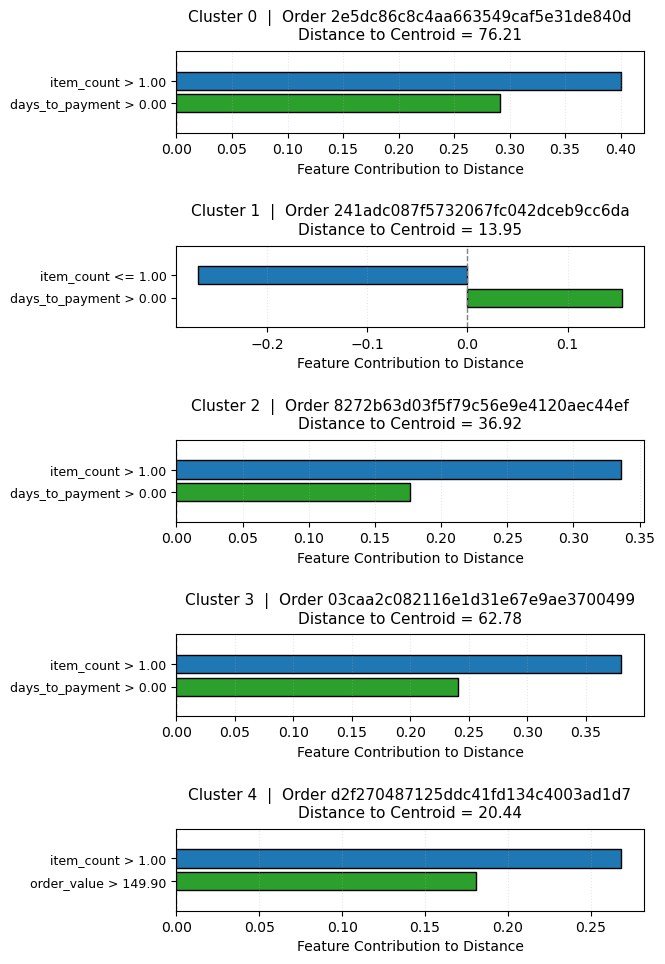

In [83]:
# Plot
n = len(summary_df)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(7, 2 * n), facecolor='white')
if n == 1:
    axes = [axes]

for ax, (_, row) in zip(axes, summary_df.iterrows()):
    feats   = [row['feature_1'], row['feature_2']]
    weights = [row['weight_1'], row['weight_2']]
    y_pos   = [0.55, 0.45]  
    bar_height = 0.08

    ax.barh(
        y=y_pos,
        width=weights,
        height=bar_height,
        color=['#1f77b4', '#2ca02c'], 
        edgecolor='black'
    )

    ax.set_yticks(y_pos)
    ax.set_yticklabels(feats)
    ax.axvline(0, color='gray', linewidth=1, linestyle='--')
    
    ax.set_ylim(0.4 - bar_height, 0.6 + bar_height)  

    ax.set_title(
        f"Cluster {row['cluster']}  |  Order {row['order_id']}\n"
        f"Distance to Centroid = {row['kmeans_dist']:.2f}",
        fontsize=11,
        pad=8
    )

    ax.set_xlabel("Feature Contribution to Distance", fontsize=10)
    ax.grid(axis='x', linestyle=':', alpha=0.3)
    ax.tick_params(axis='y', labelsize=9)

plt.tight_layout(pad=2)
plt.show()


In [84]:
# Drop missing values in the required features
df_pca = payment_features_clean.dropna(subset=features_reduced).copy()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca[features_reduced])

# PCA to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Assign back the components
df_pca['pca1'] = X_pca[:, 0]
df_pca['pca2'] = X_pca[:, 1]

# Add to the main DataFrame
payment_features_clean.loc[df_pca.index, 'pca1'] = df_pca['pca1']
payment_features_clean.loc[df_pca.index, 'pca2'] = df_pca['pca2']

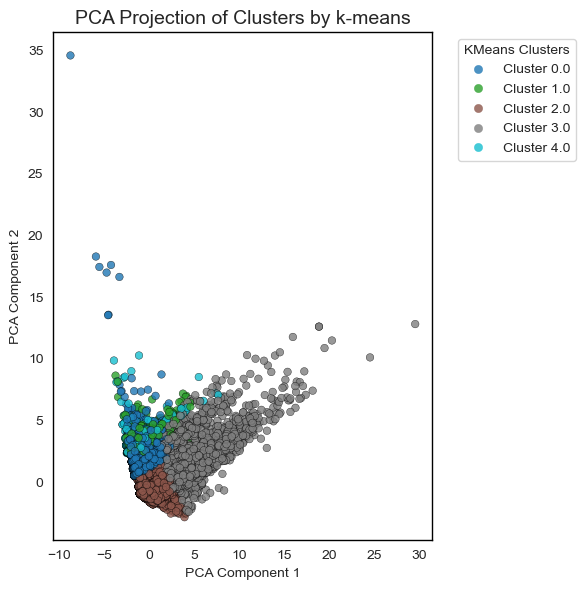

In [85]:
df = payment_features_clean.dropna(subset=['pca1', 'pca2', 'kmeans_label'])

plt.figure(figsize=(6, 6), facecolor='white')
sns.set_style("white")

scatter = plt.scatter(
    df['pca1'], df['pca2'],
    c=df['kmeans_label'],
    cmap='tab10',
    s=30,
    edgecolors='black',
    linewidths=0.3,
    alpha=0.8
)

plt.xlabel('PCA Component 1', fontsize=10)
plt.ylabel('PCA Component 2', fontsize=10)
plt.title('PCA Projection of Clusters by k-means', fontsize=14)

for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f'Cluster {i}' for i in sorted(df["kmeans_label"].unique())],
           title="KMeans Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Features patterns across models

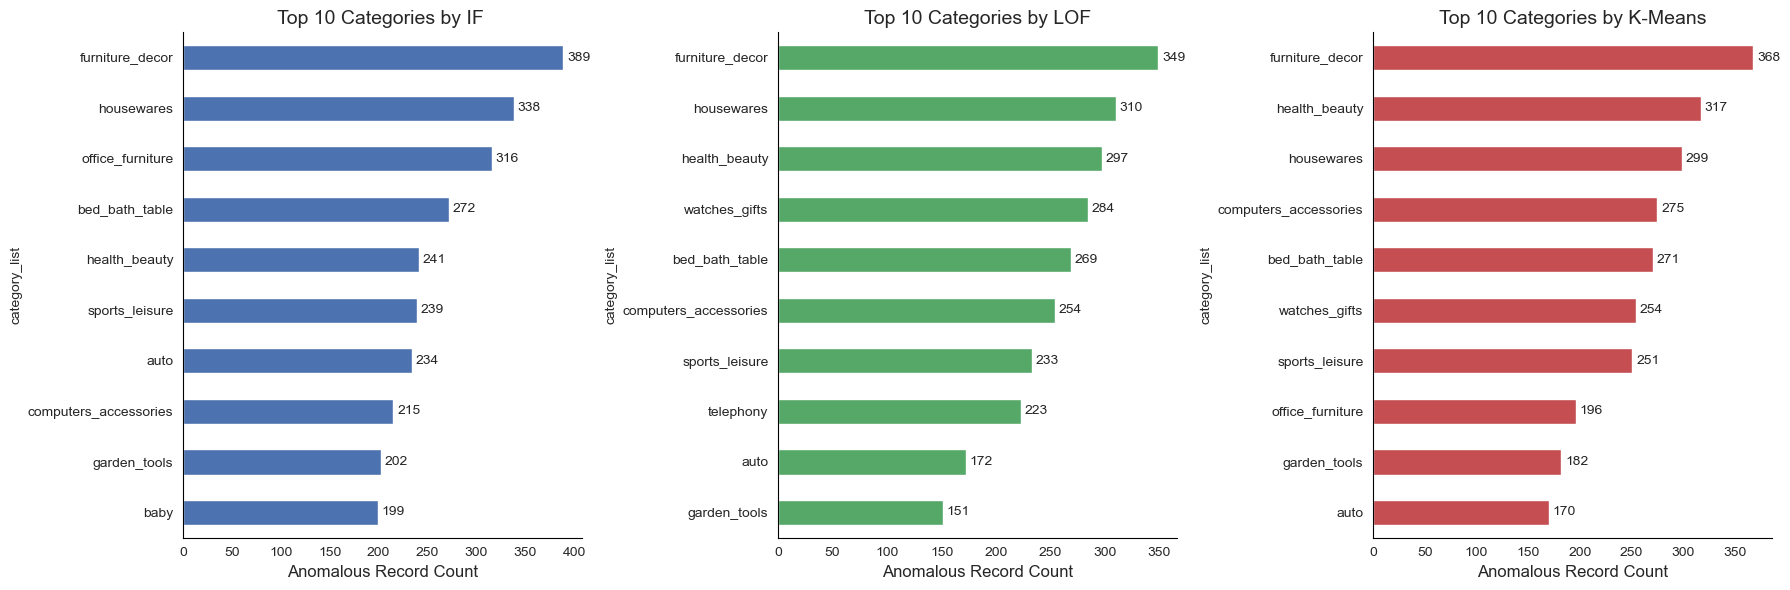

In [86]:
df = payment_features_clean

# get top 10 categories by count of flagged orders for each method
count_iso = df.loc[df['iso_anomaly_flag']==1, 'category_list'].value_counts().nlargest(10)
count_lof = df.loc[df['lof_anomaly_flag']==1, 'category_list'].value_counts().nlargest(10)
count_km  = df.loc[df['kmeans_anomaly_flag']==1, 'category_list'].value_counts().nlargest(10)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='white')
colors = ['#4c72b0', '#55a868', '#c44e52']
titles = ['Top 10 Categories by IF ', 'Top 10 Categories by LOF', 'Top 10 Categories by K-Means']
for ax, counts, title, color in zip(axes, [count_iso, count_lof, count_km], titles, colors):
    counts.plot.barh(ax=ax, color=color)
    ax.invert_yaxis()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Anomalous Record Count', fontsize=12)
    max_count = counts.max()
    for bar in ax.patches:
        ax.text(
            bar.get_width() + max_count * 0.01,
            bar.get_y() + bar.get_height()/2,
            f'{int(bar.get_width()):,}',
            va='center',
            fontsize=10
        )
   
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

plt.tight_layout()
plt.show()


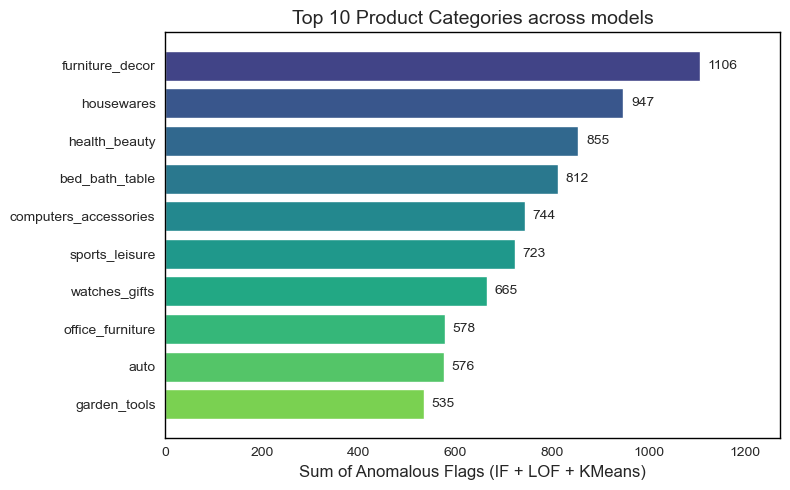

Top 10 Categories by Sum of Anomaly Flags Across Methods:



,category_list,combined_flag_sum
0,furniture_decor,1106.0
1,housewares,947.0
2,health_beauty,855.0
3,bed_bath_table,812.0
4,computers_accessories,744.0
5,sports_leisure,723.0
6,watches_gifts,665.0
7,office_furniture,578.0
8,auto,576.0
9,garden_tools,535.0


In [87]:
df = payment_features_clean.copy()
df['combined_flag_count'] = (
    df['iso_anomaly_flag'] +
    df['lof_anomaly_flag'] +
    df['kmeans_anomaly_flag']
)

# Aggregate: sum of flags per category
combined_counts = (
    df.groupby('category_list')['combined_flag_count']
    .sum()
    .sort_values(ascending=False)
)

# Top 10 categories
top10_combined = combined_counts.head(10)
summary_table = top10_combined.reset_index()
summary_table.columns = ['category_list', 'combined_flag_sum']

# Plot
fig, ax = plt.subplots(figsize=(8, 5), facecolor='white')
ax.set_facecolor('white')

bars = ax.barh(
    summary_table['category_list'],
    summary_table['combined_flag_sum'],
    color=plt.cm.viridis(np.linspace(0.2, 0.8, len(summary_table)))
)
ax.invert_yaxis()

# Title and labels
ax.set_title('Top 10 Product Categories across models', fontsize=14)
ax.set_xlabel('Sum of Anomalous Flags (IF + LOF + KMeans)', fontsize=12)

xmax = summary_table['combined_flag_sum'].max()
ax.set_xlim(right=xmax * 1.15)


for bar in bars:
    width = bar.get_width()
    ax.text(
        width + xmax * 0.015, 
        bar.get_y() + bar.get_height() / 2,
        f'{int(width)}',
        va='center',
        fontsize=10
    )

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

print("Top 10 Categories by Sum of Anomaly Flags Across Methods:\n")
display(summary_table)


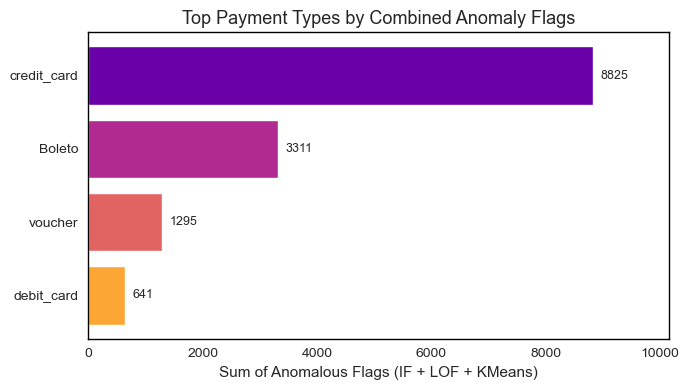

Top Payment Types by Sum of Anomaly Flags Across Methods:



,payment_type,combined_flag_sum
0,credit_card,8825.0
1,Boleto,3311.0
2,voucher,1295.0
3,debit_card,641.0


In [88]:
df = payment_features_clean.copy()

# Reconstruct original 'payment_type' from one-hot columns
payment_dummies = [col for col in df.columns if col.startswith('payment_type_')]

def reverse_ohe(row):
    for col in payment_dummies:
        if row[col] == 1:
            return col.replace('payment_type_', '')
    return 'Boleto'

df['payment_type'] = df.apply(reverse_ohe, axis=1)

# Calculate total anomaly score across 3 methods
df['combined_flag_count'] = (
    df['iso_anomaly_flag'] +
    df['lof_anomaly_flag'] +
    df['kmeans_anomaly_flag']
)

# Aggregate: total anomalies by payment type
pt_combined_counts = (
    df.groupby('payment_type')['combined_flag_count']
    .sum()
    .sort_values(ascending=False)
)

# Prepare top N (or all if there are few)
top_pt = pt_combined_counts.head(10)
summary_pt = top_pt.reset_index()
summary_pt.columns = ['payment_type', 'combined_flag_sum']

# Plotting
fig, ax = plt.subplots(figsize=(7, 4), facecolor='white')
ax.set_facecolor('white')

bars = ax.barh(
    summary_pt['payment_type'],
    summary_pt['combined_flag_sum'],
    color=plt.cm.plasma(np.linspace(0.2, 0.8, len(summary_pt)))
)
ax.invert_yaxis()

ax.set_title('Top Payment Types by Combined Anomaly Flags', fontsize=13)
ax.set_xlabel('Sum of Anomalous Flags (IF + LOF + KMeans)', fontsize=11)

# Expand x-axis slightly
xmax = summary_pt['combined_flag_sum'].max()
ax.set_xlim(right=xmax * 1.15)

# Annotate bars
for bar in bars:
    w = bar.get_width()
    ax.text(
        w + xmax * 0.015,
        bar.get_y() + bar.get_height() / 2,
        f'{int(w)}',
        va='center',
        fontsize=9
    )

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

print("Top Payment Types by Sum of Anomaly Flags Across Methods:\n")
display(summary_pt)


C:\Users\Arushi\AppData\Local\Temp\ipykernel_10848\623647335.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('order_value_bin')['combined_flag_count']


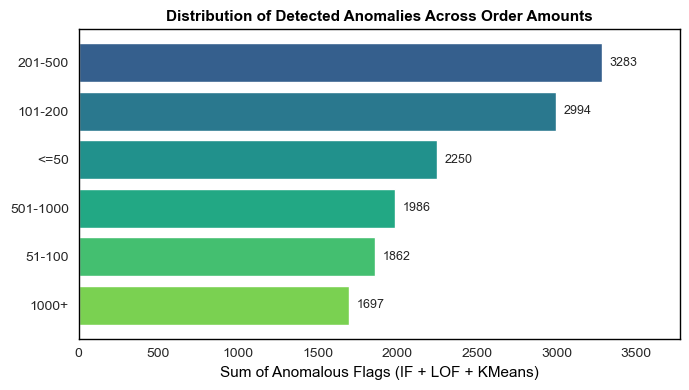

Anomaly Flag Sum by Order Value Range:



,order_value_bin,combined_flag_sum
0,201-500,3283.0
1,101-200,2994.0
2,<=50,2250.0
3,501-1000,1986.0
4,51-100,1862.0
5,1000+,1697.0


In [89]:
df = payment_features_clean.copy()

# Combine anomaly flags
df['combined_flag_count'] = (
    df['iso_anomaly_flag'] +
    df['lof_anomaly_flag'] +
    df['kmeans_anomaly_flag']
)

# Bin the order_value
order_bins = [0, 50, 100, 200, 500, 1000, np.inf]
bin_labels = ['<=50', '51-100', '101-200', '201-500', '501-1000', '1000+']
df['order_value_bin'] = pd.cut(df['order_value'], bins=order_bins, labels=bin_labels)

# Summarize anomaly flags by bin
bin_summary = (
    df.groupby('order_value_bin')['combined_flag_count']
    .sum()
    .sort_values(ascending=False)
)

summary_df = bin_summary.reset_index()
summary_df.columns = ['order_value_bin', 'combined_flag_sum']

# Plot
fig, ax = plt.subplots(figsize=(7, 4), facecolor='white')
ax.set_facecolor('white')

y_pos = np.arange(len(summary_df))
bars = ax.barh(
    y=y_pos,
    width=summary_df['combined_flag_sum'],
    color=plt.cm.viridis(np.linspace(0.3, 0.8, len(summary_df)))
)
ax.set_yticks(y_pos)
ax.set_yticklabels(summary_df['order_value_bin'])

ax.invert_yaxis()

ax.set_title('Distribution of Detected Anomalies Across Order Amounts', fontsize=11, color='black', fontweight='bold')
ax.set_xlabel('Sum of Anomalous Flags (IF + LOF + KMeans)', fontsize=11, color='black')

xmax = summary_df['combined_flag_sum'].max()
ax.set_xlim(right=xmax * 1.15)

# Annotate bars
for bar in bars:
    w = bar.get_width()
    ax.text(
        w + xmax * 0.015,
        bar.get_y() + bar.get_height() / 2,
        f'{int(w)}',
        va='center',
        fontsize=9
    )

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()


print("Anomaly Flag Sum by Order Value Range:\n")
display(summary_df)


C:\Users\Arushi\AppData\Local\Temp\ipykernel_10848\3914660302.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('installment_bin')['combined_flag_count']


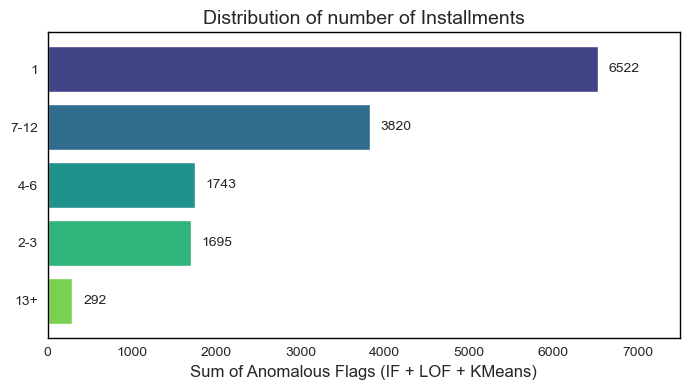

Anomaly Flag Sums by Installment Bin:



,installment_bin,combined_flag_count
0,1,6522.0
3,7-12,3820.0
2,4-6,1743.0
1,2-3,1695.0
4,13+,292.0


In [90]:
df = payment_features_clean.copy()

# Compute combined anomaly flag
df['combined_flag_count'] = (
    df['iso_anomaly_flag'] +
    df['lof_anomaly_flag'] +
    df['kmeans_anomaly_flag']
)

# Bin the num_installments
bins = [0, 1, 3, 6, 12, np.inf]
labels = ['1', '2-3', '4-6', '7-12', '13+']
df['installment_bin'] = pd.cut(df['num_installments'], bins=bins, labels=labels, right=True)

# Aggregate by installment bin
installment_summary = (
    df.groupby('installment_bin')['combined_flag_count']
    .sum()
    .reset_index()
    .sort_values(by='combined_flag_count', ascending=False)
)

# Plot
fig, ax = plt.subplots(figsize=(7, 4), facecolor='white')
ax.set_facecolor('white')

bars = ax.barh(
    installment_summary['installment_bin'].astype(str),
    installment_summary['combined_flag_count'],
    color=plt.cm.viridis(np.linspace(0.2, 0.8, len(installment_summary)))
)
ax.invert_yaxis()

# Title and labels
ax.set_title('Distribution of number of Installments', fontsize=14)
ax.set_xlabel('Sum of Anomalous Flags (IF + LOF + KMeans)', fontsize=12)

xmax = installment_summary['combined_flag_count'].max()
ax.set_xlim(right=xmax * 1.15)

# Bar annotations
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + xmax * 0.02, 
        bar.get_y() + bar.get_height() / 2,
        f'{int(width)}',
        va='center',
        fontsize=10
    )

# Border styling
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

# Display result
print("Anomaly Flag Sums by Installment Bin:\n")
display(installment_summary)